In [694]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [695]:
# Import custom libraries
import warnings
import sys
import os

# Importamos lo necesario para trabajar con consultas SQL

from pandasql import sqldf

# Definir función de consulta
pysqldf = lambda q: sqldf(q, globals())

### CARGA DE LOS DATOS

In [696]:
url = 'https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/raw/survey_ready.xlsx'
df = pd.read_excel(url, na_values='#N/D')

In [697]:
df

,id_empleado,rango_edad,genero,estado_civil,estudios,departamento,area,puesto,antigüedad,trabajo_varias_areas,...,notas_capacitacion,tiempo_puesto,meses_ultima_promocion,meses_jefe_actual,considerado_abandono_empresa,motivo_abandono_empresa,mejoras_para_reduccion_rotacion,factores_externos_influencia,factores_externos_opciones,comentarios_experiencia_empresa
0,InMex001,40-44,Femenino,Casado/a,Licenciatura,Operaciones,Operaciones,Contraloria y finanzas,70,No,...,NaN,70,NaN,48,Si,Me siento frustrada porque me exigen resultado...,Considero que seria importante establecer limi...,Si,"Oferta laboral en otras empresas, Salario poco...","El ambiente laboral, los constantes cambios de..."
1,InMex002,30-34,Masculino,Soltero/a,Posgrado,Operaciones,Operaciones,Gerente,109,Si,...,NaN,48,48.0,84,Si,Asumir responsabilidades sin falta de capacita...,Delimitar alcances dentro de las funsiones de ...,Si,"Oferta laboral en otras empresas, Distancia en...","Conflicto de intereses entre la direccion, fal..."
2,InMex003,30-34,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,Metrologo,29,No,...,4.0,29,NaN,5,Si,Falta de reconocimiento y recompensa (no monet...,Reconocimiento con premios aunque no sean mone...,Si,"Oferta laboral en otras empresas, Distancia en...",En general no es malo el trabajo solo que la m...
3,InMex004,30-34,Masculino,Soltero/a,Licenciatura,Mediciones Especiales,Tecnica,Metrologo,34,Si,...,4.0,9,9.0,9,Si,Para obtener un salario mayor al que recibo.,"Mejores salarios, tomar en cuenta la experienc...",Si,"Oferta laboral en otras empresas, Condiciones ...",El ambiente laboral me agrada bastante y creo ...
4,InMex005,45-49,Femenino,Soltero/a,Licenciatura,Tecnica,Tecnica,Gerente,254,Si,...,NaN,72,72.0,72,No,NaN,Mejoras en los salarios,No,NaN,NaN
5,InMex006,30-34,Masculino,Soltero/a,Licenciatura,Comercial,Comercial,Asesor comercial,34,Si,...,5.0,28,28.0,22,No,NaN,"Mejores salarios, definicion de funciones y re...",No,NaN,NaN
6,InMex007,25-29,Masculino,Soltero/a,Licenciatura,Masa,Tecnica,Metrologo,8,No,...,5.0,8,NaN,8,No,NaN,Contratacion de personal competente,No,NaN,NaN
7,InMex008,45-49,Femenino,Soltero/a,Licenciatura,Calidad,Calidad,Gerente,252,Si,...,NaN,84,84.0,60,No,NaN,Mejor observacion en el proceso de contratacio...,Si,"Responsabilidades familiares, Condiciones econ...",En general estoy agusto con las actividades qu...
8,InMex009,40-44,Masculino,Casado/a,Tecnico,Masa,Tecnica,Metrologo,119,No,...,5.0,119,NaN,9,No,NaN,Mas prestaciones,No,NaN,Ninguna
9,InMex010,30-34,Masculino,Soltero/a,Licenciatura,Kaye,Tecnica,Jefe de laboratorio,36,Si,...,4.0,8,3.0,36,Si,Por crecimiento profesional y economico,"Incluir mas prestaciones como caja de ahorro, ...",Si,"Distancia entre casa y trabajo, Responsabilida...",Considero importante que se tome en cuenta la ...


## BUSINESS ANALYTICS

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_empleado                      41 non-null     object 
 1   rango_edad                       41 non-null     object 
 2   genero                           41 non-null     object 
 3   estado_civil                     41 non-null     object 
 4   estudios                         41 non-null     object 
 5   departamento                     41 non-null     object 
 6   area                             41 non-null     object 
 7   puesto                           41 non-null     object 
 8   antigüedad                       41 non-null     int64  
 9   trabajo_varias_areas             41 non-null     object 
 10  numero_areas                     41 non-null     int64  
 11  carrera                          41 non-null     object 
 12  numero_empresas         

#### ANÁLISIS DE NULOS

In [699]:
df.isna().sum().sort_values(ascending = False)

meses_ultima_promocion             21
motivo_abandono_empresa            20
factores_externos_opciones         16
comentarios_experiencia_empresa    15
notas_capacitacion                  8
estudios                            0
estado_civil                        0
genero                              0
rango_edad                          0
id_empleado                         0
departamento                        0
puesto                              0
area                                0
satisfaccion_entorno                0
satisfaccion_puesto_actual          0
implicacion_puesto                  0
antigüedad                          0
trabajo_varias_areas                0
numero_areas                        0
carrera                             0
numero_empresas                     0
horas_extras_semanales              0
horas_trabajo_mensual               0
evaluaciones_desempeno_ult_ano      0
satisfaccion_laboral_personal       0
valoracion_companeros               0
salario_mens

#### EDA VARIABLES CATEGÓRICAS

In [700]:
df.dtypes[df.dtypes == 'object'].index

Index(['id_empleado', 'rango_edad', 'genero', 'estado_civil', 'estudios',
       'departamento', 'area', 'puesto', 'trabajo_varias_areas', 'carrera',
       'valoracion_companeros', 'evaluaciones_desempeno_ult_ano',
       'salario_mensual', 'aumento_salario_ult_dos_anos',
       'viajes_mensuales_laborales', 'capacitaciones',
       'considerado_abandono_empresa', 'motivo_abandono_empresa',
       'mejoras_para_reduccion_rotacion', 'factores_externos_influencia',
       'factores_externos_opciones', 'comentarios_experiencia_empresa'],
      dtype='object')

In [701]:
# Separar los posibles valores de la columna 'factores_externos_opciones' en una lista
opciones_posibles = [
    'Oferta laboral en otras empresas',
    'Distancia entre casa y trabajo',
    'Falta de transporte adecuado',
    'Salario poco competitivo en el mercado',
    'Responsabilidades familiares',
    'Condiciones economicas generales',
    'Falta de oportunidades de crecimiento profesional',
    'Ambiente laboral',
    'Factores personales',
    'Otro'
]

df['factores_externos_opciones'] = df['factores_externos_opciones'].fillna('')

df_factores_opciones_dummies = df['factores_externos_opciones'].str.get_dummies(sep=', ')

for opcion in opciones_posibles:
     if opcion not in df_factores_opciones_dummies.columns:
        df_factores_opciones_dummies[opcion] = 0 
        
# Unir las nuevas columnas binarias al DataFrame original
df = pd.concat([df, df_factores_opciones_dummies], axis=1)

In [702]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import ceil

def graficos_eda_categoricos(cat_df):
    columnas = cat_df.columns
    n_vars = len(columnas)
    filas = ceil(n_vars / 2)

    fig = make_subplots(rows=filas, cols=2, subplot_titles=columnas)

    for i, col in enumerate(columnas):
        row = (i // 2) + 1
        col_position = (i % 2) + 1

        conteos = cat_df[col].value_counts()
        #total = conteos.sum()
        porcentajes = (conteos / 41 * 100).round(2)

        # Añadimos el gráfico de barras con etiquetas de porcentaje
        fig.add_trace(
            go.Bar(
                x=conteos.values,
                y=conteos.index,
                orientation='h',
                name=col,
                text=[f"{p}%" for p in porcentajes],
                textposition='auto',
                #marker=dict(color='steelblue')
            ),
            row=row,
            col=col_position
        )

    fig.update_layout(
        height=filas * 400,
        width=1000,
        title_text="Distribución de Variables Categóricas",
        showlegend=False
    )

    fig.update_annotations(font_size=12, font=dict(color="black"))
    fig.show()


In [703]:
df_cat_inf_personal = df[['rango_edad', 'genero', 'estado_civil', 'estudios', 'carrera']]

df_cat_trabajo = df[['departamento', 'area', 'puesto', 'trabajo_varias_areas', 
       'salario_mensual','evaluaciones_desempeno_ult_ano', 'viajes_mensuales_laborales', 'aumento_salario_ult_dos_anos', 
       'considerado_abandono_empresa', 'factores_externos_influencia']]

df_cat_rel = df[['valoracion_companeros', 'capacitaciones']]

In [704]:
graficos_eda_categoricos(df_cat_inf_personal)

In [705]:
graficos_eda_categoricos(df_cat_trabajo)

In [706]:
graficos_eda_categoricos(df_cat_rel)

#### EDA VARIABLES NUMÉRICAS

In [707]:
# Análisis de las variables numéricas

df_num = df.select_dtypes('number')
df_num.columns

Index(['antigüedad', 'numero_areas', 'numero_empresas', 'satisfaccion_entorno',
       'satisfaccion_puesto_actual', 'implicacion_puesto',
       'satisfaccion_laboral_personal', 'horas_trabajo_mensual',
       'horas_extras_semanales', 'porciento_aumento_salarial',
       'tiempo_traslado_diario', 'notas_capacitacion', 'tiempo_puesto',
       'meses_ultima_promocion', 'meses_jefe_actual', 'Ambiente laboral',
       'Condiciones economicas generales', 'Distancia entre casa y trabajo',
       'Factores personales',
       'Falta de oportunidades de crecimiento profesional',
       'Falta de transporte adecuado', 'Oferta laboral en otras empresas',
       'Otro', 'Responsabilidades familiares',
       'Salario poco competitivo en el mercado'],
      dtype='object')

In [708]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [709]:
estadisticos_cont(df_num)

,count,mean,median,std,min,25%,50%,75%,max
antigüedad,41.0,61.658537,32.00,70.214176,4.0,17.0,32.00,89.0,254.0
numero_areas,41.0,1.707317,1.00,1.006079,1.0,1.0,1.00,2.0,5.0
numero_empresas,41.0,2.878049,3.00,1.964626,0.0,2.0,3.00,3.0,8.0
satisfaccion_entorno,41.0,3.536585,4.00,1.027073,1.0,3.0,4.00,4.0,5.0
satisfaccion_puesto_actual,41.0,3.731707,4.00,1.072949,1.0,3.0,4.00,5.0,5.0
implicacion_puesto,41.0,3.975610,4.00,0.907959,2.0,3.0,4.00,5.0,5.0
satisfaccion_laboral_personal,41.0,3.658537,4.00,1.039465,1.0,3.0,4.00,4.0,5.0
horas_trabajo_mensual,41.0,44.146341,45.00,5.701145,25.0,41.0,45.00,48.0,55.0
horas_extras_semanales,41.0,1.585366,1.00,2.085373,0.0,0.0,1.00,2.0,10.0
porciento_aumento_salarial,41.0,7.069512,0.00,11.192603,0.0,0.0,0.00,19.0,30.0


Conclusiones:

* ``meses_ultima_promocion`` --> Imputar los valores faltantes con antigüedad
* ``notas_capacitacion``  --> Tiene pocos valores. Eliminarla

In [710]:
df.drop(columns = ['notas_capacitacion'], inplace = True, errors = 'ignore')
df_num.drop(columns = ['notas_capacitacion'], inplace = True, errors = 'ignore')

In [711]:
df_num['meses_ultima_promocion'].fillna(df_num['antigüedad'], inplace=True)
estadisticos_cont(df_num)


C:\Users\Miguel Oscar\AppData\Local\Temp\ipykernel_23608\3322613145.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,count,mean,median,std,min,25%,50%,75%,max
antigüedad,41.0,61.658537,32.00,70.214176,4.0,17.0,32.00,89.0,254.0
numero_areas,41.0,1.707317,1.00,1.006079,1.0,1.0,1.00,2.0,5.0
numero_empresas,41.0,2.878049,3.00,1.964626,0.0,2.0,3.00,3.0,8.0
satisfaccion_entorno,41.0,3.536585,4.00,1.027073,1.0,3.0,4.00,4.0,5.0
satisfaccion_puesto_actual,41.0,3.731707,4.00,1.072949,1.0,3.0,4.00,5.0,5.0
implicacion_puesto,41.0,3.975610,4.00,0.907959,2.0,3.0,4.00,5.0,5.0
satisfaccion_laboral_personal,41.0,3.658537,4.00,1.039465,1.0,3.0,4.00,4.0,5.0
horas_trabajo_mensual,41.0,44.146341,45.00,5.701145,25.0,41.0,45.00,48.0,55.0
horas_extras_semanales,41.0,1.585366,1.00,2.085373,0.0,0.0,1.00,2.0,10.0
porciento_aumento_salarial,41.0,7.069512,0.00,11.192603,0.0,0.0,0.00,19.0,30.0


# Análisis de los estadísticos descriptivos de las variables numéricas

A continuación se resumen los principales hallazgos tras aplicar `.describe()` a las 19 variables numéricas del cuestionario (n = 41, sin valores perdidos):

| Variable                          | Media       | Mediana  | Rango (mín–máx)     | Observaciones clave                                    |
|-----------------------------------|------------:|---------:|---------------------|--------------------------------------------------------|
| **antigüedad (meses)**            | 61,7        | 32       | 4 – 254             | Distribución muy sesgada a la derecha; algunos empleados llevan décadas en la empresa.  |
| **número de áreas**               | 1,7         | 1        | 1 – 5               | La mitad solo trabaja en un área; un pequeño grupo cubre hasta 5.                      |
| **número de empresas previas**    | 2,9         | 3        | 0 – 8               | Un 25 % nunca ha cambiado de empresa; un 75 % entre 2 y 3 cambios.                     |
| **satisfacción con el entorno**   | 3,54 (1–5)  | 4        | 1 – 5               | Nivel de satisfacción medio‑alto; relativamente poca variabilidad.                     |
| **implicación en el puesto**      | 3,73 (1–5)  | 4        | 1 – 5               | Mayor tendencia a implicarse; valores concentrados en 3–5.                             |
| **satisfacción laboral personal** | 3,98 (1–5)  | 4        | 2 – 5               | Elevada satisfacción personal; pocos casos por debajo de 3.                            |
| **horas de trabajo / semana**     | 44,1        | 45       | 25 – 55             | Jornada semanal típica entre 41 y 48 h; hay empleados a tiempo parcial (~25 h).        |
| **horas extra / semana**          | 1,6         | 1        | 0 – 10              | Mediana de 1 h extra; un 50 % no hace horas extra, pero hay picos de hasta 10 h.       |
| **% aumento salarial último año**  | 7,1 %       | 0 %      | 0 % – 30 %          | La mitad no recibió aumento; algunos sí recibieron hasta +30 %.                       |
| **tiempo de traslado / día (h)**  | 2,7         | 2,25     | 0 – 6               | Desplazamientos diarios moderados; el cuartil superior > 4 h/día.                      |
| **tiempo en el puesto (meses)**   | 32,5        | 18       | 2 – 166             | Fuerte asimetría: muchos en el puesto < 2 años, unos pocos “veteranos” llevan > 10 años. |
| **meses desde última promoción**  | 33,0        | 19       | 0 – 238             | Hay promociones recientes, pero también casos sin promoción en décadas.               |
| **meses con jefe actual**         | 27,1        | 22       | 4 – 84              | La mayoría tiene al mismo jefe desde 1–3 años; algunos llevan > 7 años.                |
| **Indicadores factor “Sí/No”**    |             |          |                     |                                                        |
| – Salario poco competitivo        | 21,95 %     | –        | 0 / 1               | 9 de cada 41 lo señalaron.                                                          |
| – Condiciones económicas          | 34,15 %     | –        | 0 / 1               | Uno de cada tres lo mencionó.                                                       |
| – … (otros factores externos)     | 4,9 %–34,1 %| –        | 0 / 1               | Tasas de incidencia bajas a medias.                                                |

---

## Conclusiones principales

1. **Experiencias muy heterogéneas en el tiempo**  
   – Antigüedades y permanencia en el puesto muestran distribuciones muy sesgadas por unos pocos “veteranos”.  
   – Revisar si conviene agrupar rangos largos para simplificar el análisis (p. ej. < 5 años, 5–10, > 10).

2. **Satisfacción y carga de trabajo**  
   – La satisfacción general es alta (medianas = 4), con poca varianza.  
   – Horas extra y traslados presentan colas largas; conviene estudiar casos extremos (> 10 h extra/semana o > 4 h de traslado diario).

3. **Movilidad y promociones**  
   – Más de la mitad no ha recibido aumento salarial en el último año ni promoción reciente (medianas = 0 en ambos).  
   – Podría analizarse la relación entre falta de aumentos/promociones y la intención de abandono.

4. **Selección de factores de abandono**  
   – Entre los factores externos, “Condiciones económicas” y “Salario poco competitivo” son los más frecuentes (≈ 20 %–35 %).  
   – El resto de factores externos obtienen incidencias bajas (< 15 %), lo que focaliza la acción en la política salarial y economía interna.

---

> **Sugerencias de seguimiento**  
> - **Recodificar** variables con colas largas o muchos ceros para robustecer futuros modelos.  
> - **Cruzar** variables críticas (promociones, aumentos) con intención de abandono para validar hipótesis.  
> - **Monitorear** casos extremos en carga de trabajo y antigüedad para detectar necesidades de retención o rotación.  


In [712]:
fila_suma = df_factores_opciones_dummies.sum(axis=0)
df_suma = pd.DataFrame(fila_suma).T
df_suma.index = ['Total']
df_factores_suma = pd.concat([df_factores_opciones_dummies, df_suma])
df_factores_suma

,Ambiente laboral,Condiciones economicas generales,Distancia entre casa y trabajo,Factores personales,Falta de oportunidades de crecimiento profesional,Falta de transporte adecuado,Oferta laboral en otras empresas,Otro,Responsabilidades familiares,Salario poco competitivo en el mercado
0,1,1,0,0,1,0,1,0,0,1
1,1,1,1,1,1,0,1,0,0,1
2,1,1,1,1,0,1,1,0,0,1
3,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,1,0


In [713]:
factores_influyentes =df_factores_suma.loc['Total'].T
if isinstance(factores_influyentes, pd.Series):
    factores_influyentes = factores_influyentes.to_frame()
factores_influyentes

,Total
Ambiente laboral,9
Condiciones economicas generales,14
Distancia entre casa y trabajo,13
Factores personales,5
Falta de oportunidades de crecimiento profesional,7
Falta de transporte adecuado,2
Oferta laboral en otras empresas,10
Otro,4
Responsabilidades familiares,8
Salario poco competitivo en el mercado,17


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [714]:
# Cambiar nombre de la columna
df.rename(columns = {'considerado_abandono_empresa': 'abandono'}, inplace = True, errors = 'ignore')

In [715]:
df.abandono.value_counts(normalize = True) * 100

abandono
Si    51.219512
No    48.780488
Name: proportion, dtype: float64

#### 🚨🚨 La tasa de empleados que han considerado abandonar la empresa en los últimos 6 meses es del ``51.2%``.

## Análisis de los estadísticos descriptivos de las variables numéricas

1. **Experiencias muy heterogéneas en el tiempo**  
   – Antigüedades y permanencia en el puesto muestran distribuciones muy sesgadas por unos pocos “veteranos”.  
2. **Satisfacción y carga de trabajo**  
   – La satisfacción general es alta (medianas = 4), con poca varianza.  
   – Horas extra y traslados presentan colas largas; conviene estudiar casos extremos (> 10 h extra/semana o > 4 h de traslado diario).
3. **Movilidad y promociones**  
   – Más de la mitad no ha recibido aumento salarial en el último año ni promoción reciente (medianas = 0 en ambos).  
   – Podría analizarse la relación entre falta de aumentos/promociones y la intención de abandono.
4. **Selección de factores de abandono**  
   – Entre los factores externos, “Condiciones económicas” y “Salario poco competitivo” son los más frecuentes (≈ 20 %–35 %).  
   – El resto de factores externos obtienen incidencias bajas (< 15 %), lo que focaliza la acción en la política salarial y economía interna.
---
**Seguimiento**  
- **Recodificar** variables con colas largas o muchos ceros para robustecer futuros modelos.  
- **Cruzar** variables críticas (promociones, aumentos) con intención de abandono para validar hipótesis.  
- **Monitorear** casos extremos en carga de trabajo y antigüedad para detectar necesidades de retención o rotación.  
---

### Perfil tipo de empleado que ha considerado dejar la empresa.

In [716]:
import plotly.express as px
import pandas as pd # Aún es buena práctica importarlo si trabajamos con Series de pandas

def graficar_serie_con_valores(data_series, titulo=None, xlabel=None, ylabel=None, decimales=1):
    """
    Genera un gráfico de barras interactivo (Plotly) a partir de una Serie de pandas,
    mostrando los valores de la Serie (con formato porcentual) sobre las barras.

    Args:
        data_series (pd.Series): La Serie de pandas a graficar. El índice son las categorías,
                                 los valores son los números a mostrar sobre las barras.
        titulo (str, optional): El título del gráfico. Si es None, se genera uno por defecto
                                 usando el nombre de la Serie y el índice.
        xlabel (str, optional): Etiqueta para el eje X. Si es None, usa el nombre del índice de la Serie.
        ylabel (str, optional): Etiqueta para el eje Y. Si es None, usa el nombre de la Serie o 'Valor'.
        decimales (int, optional): Número de decimales a mostrar en las etiquetas de texto
                                   sobre las barras. Por defecto es 1.

    Returns:
        plotly.graph_objects.Figure: El objeto figura de Plotly. Debes usar fig.show()
                                      para mostrar el gráfico.
    """
    # Asegurarse de que la entrada sea una Serie de pandas
    if not isinstance(data_series, pd.Series):
        print("Error: La entrada debe ser una Serie de pandas.")
        return None

    # Formatear los valores de la Serie como texto para las etiquetas
    # Asumimos que los valores son porcentajes (o quieres mostrarlos como tal)
    # Crear el string de formato dinámicamente según el número de decimales
    formato_texto = f'{{:.{decimales}f}}%'
    etiquetas_texto = [formato_texto.format(valor) for valor in data_series.values]

    # Definir etiquetas y título por defecto si no se proporcionan
    if titulo is None:
        # Usar el nombre de la Serie y el nombre del índice si están disponibles
        serie_name = data_series.name if data_series.name is not None else "Valor"
        index_name = data_series.index.name if data_series.index.name is not None else "Categoría"
        titulo = f'{serie_name} por {index_name}'

    if xlabel is None:
        xlabel = data_series.index.name if data_series.index.name is not None else "Categoría"

    if ylabel is None:
        # Si la Serie tiene nombre, usarlo y añadir %, sino usar un nombre genérico
        ylabel = f'{data_series.name} (%)' if data_series.name is not None else "Valor (%)"


    # Crear el gráfico de barras con Plotly Express
    fig = px.bar(
        x=data_series.index,   # Eje X: el índice de la Serie (las categorías, ej: rangos de edad)
        y=data_series.values,  # Eje Y: los valores de la Serie (los porcentajes calculados)
        height=800,
        width=1000,
        text=etiquetas_texto,  # Añade las etiquetas de texto a las barras (los valores de la Serie formateados)
        labels={'x': xlabel, 'y': ylabel}, # Etiquetas para los ejes
        title=titulo
    )

    # Ajustar la posición del texto (opcional pero recomendado)
    fig.update_traces(textposition='outside') # 'outside' o 'inside'

    # Retornar el objeto figura de Plotly
    return fig


In [717]:
# Cambiar nombre de la columna
df.rename(columns = {'considerado_abandono_empresa': 'abandono'}, inplace = True, errors = 'ignore')
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Si':1})

In [718]:
# Analisis por edad
temp_edad = df.groupby('rango_edad').abandono.mean().sort_values(ascending = False)*100
graficar_serie_con_valores(temp_edad)

In [719]:
# Analisis por genero
temp_gen = df.groupby('genero').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_gen)

In [720]:
# Analisis por estado_civil
temp_est_civ = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_est_civ)

In [721]:
# Analisis por estudios
temp_estudios = df.groupby('estudios').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_estudios)

In [722]:
# Analisis por departamento
temp_dep = df.groupby('departamento').abandono.mean().sort_values(ascending = False) * 100
graficar_serie_con_valores(temp_dep)

In [723]:
#  Análisis por área
temp_area = df.groupby('area').abandono.mean().sort_values(ascending = False)*100
graficar_serie_con_valores(temp_area)

In [724]:
# Análisis por puesto
temp_vareas = df.groupby('trabajo_varias_areas').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_vareas)

In [725]:
# Análisis por carrera
temp_carrera = df.groupby('carrera').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_carrera)

In [726]:
temp_val_comp = df.groupby('valoracion_companeros').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_val_comp)


In [727]:
# Análisis  por evaluación de desempeño
temp_desemp = df.groupby('evaluaciones_desempeno_ult_ano').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_desemp)

In [728]:
# Evaluación por salario
temp_salario = df.groupby('salario_mensual').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_salario)

In [729]:
# Análisis por aumento salarial
temp_aum_sal = df.groupby('aumento_salario_ult_dos_anos').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_aum_sal)

In [730]:
# Análisis por viajes
temp_viajes = df.groupby('viajes_mensuales_laborales').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_viajes)

In [731]:
# Análisis por capacitaciones
temp_capac = df.groupby('capacitaciones').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_capac)

In [732]:
# Análisis factores_externos_influencia
temp_inf = df.groupby('factores_externos_influencia').abandono.mean().sort_values(ascending=False)*100
graficar_serie_con_valores(temp_inf)

In [733]:
if 'index' not in factores_influyentes.columns:
    factores_influyentes.reset_index(inplace=True)
factores_influyentes.rename(columns={'index': 'Factores externos de influencia'}, inplace=True, errors='ignore')
factores_influyentes.sort_values(by = 'Total', ascending = False, inplace = True)
factores_influyentes
print(factores_influyentes.columns)

Index(['Factores externos de influencia', 'Total'], dtype='object')


In [734]:
fig = px.bar(
    factores_influyentes,
    x='Factores externos de influencia',
    y='Total',
    text='Total',  # <- Aquí se indica que el texto será el valor de 'Total'
    labels={'x': 'Factores externos de influencia', 'y': 'Total'},
    title='Factores externos que influyen en la decisión de dejar la empresa',
    height=600
)

fig.update_traces(textposition='outside')  # <- Muestra el texto fuera de las barras
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')  # <- Opcional, para estética

fig.show()


# Informe Ejecutivo: Perfil del Empleado Propenso a Considerar Abandono

## Resumen Ejecutivo  
El análisis de los datos revela que el **51.2% de los empleados** ha considerado abandonar la empresa en los últimos 6 meses. A continuación, se detallan las características clave del perfil con mayor propensión a esta intención:

---

## Características Demográficas  
### **Edad**  
- **30-34 años**: 69.2%  
- **25-29 años**: 58.3%  
**Insight**: Los empleados en etapa profesional temprana (25-34 años) muestran mayor insatisfacción, posiblemente por buscar crecimiento o mejores oportunidades.

### **Género**  
- **Mujeres (F)**: 55.6%  
**Insight**: Las mujeres están ligeramente más inclinadas a considerar el abandono, aunque la diferencia no es significativa.

### **Estado Civil**  
- **Unión libre**: 66.7%  
**Insight**: La flexibilidad laboral o la falta de beneficios asociados a estabilidad familiar podrían influir.

---

## Formación y Rol Laboral  
### **Estudios**  
- **Licenciatura**: 57.6%  
**Insight**: Los empleados con formación superior pueden percibir limitaciones en su desarrollo profesional dentro de la empresa.

### **Área de Trabajo**  
- **Servicio al Cliente**: 100%  
- **Operaciones**: 71.4%  
**Insight**: Problemas críticos en **Servicio al Cliente** (ambiente, carga laboral) requieren atención inmediata.

### **Carrera Profesional**  
- **Ciencias Sociales y Administración**: 85.7%  
- **Ciencias Exactas y Naturales**: 62.5%  
**Insight**: Falta de alineación entre las expectativas profesionales y las oportunidades internas.

---

## Condiciones Laborales  
### **Salario**  
- **12k-16k**: 61.5%  
- **16k-20k**: 57.1%  
**Insight**: Incluso empleados con salarios competitivos en la empresa consideran irse, sugiriendo que factores no monetarios (ej. cultura, reconocimiento) son críticos.

### **Aumento Salarial**  
- **Sí recibió aumento**: 75%  
**Insight**: Los aumentos no mitigaron la insatisfacción, posiblemente por falta de equilibrio vida-trabajo o expectativas no cubiertas.

### **Movilidad Laboral**  
- **Trabaja en varias áreas (Sí)**: 61.1%  
**Insight**: Sobrecarga de responsabilidades o falta de especialización podrían generar estrés.

---

## Factores Culturales y Externos  
### **Valoración de Compañeros**  
- **No valoran a sus compañeros**: 100%  
**Insight**: Ambiente laboral tóxico o falta de colaboración es un **factor crítico de abandono**.

### **Factores Externos**  
- **Influyen externamente (Sí)**: 72%  
**Insight**: El mercado laboral competitivo ofrece alternativas atractivas para empleados insatisfechos.

---

## Recomendaciones Estratégicas  
1. **Priorizar áreas críticas**: Investigar y resolver problemas en **Servicio al Cliente** y **Operaciones**.  
2. **Reforzar la cultura organizacional**: Mejorar el ambiente laboral y fomentar la colaboración.  
3. **Desarrollo profesional**: Crear planes de carrera claros, especialmente para licenciados y empleados en rangos de 25-34 años.  
4. **Revisión de beneficios no salariales**: Incluir flexibilidad horaria, reconocimiento y capacitaciones relevantes.  

**Conclusión**: La retención requiere abordar tanto factores económicos como culturales, con enfoque en grupos demográficos y áreas de alto riesgo identificadas.

# Análisis de factores externos que influyen en la decisión de dejar la empresa

De los 21 empleados que han pensado en irse en los últimos seis meses, éstos son los motivos externos señalados:

| Factor                                               | Votos | % aprox. |
|------------------------------------------------------|:-----:|:--------:|
| **Salario poco competitivo en el mercado**           |  17   |   81 %   |
| **Condiciones económicas generales**                 |  14   |   67 %   |
| **Distancia entre casa y trabajo**                   |  13   |   62 %   |
| **Oferta laboral en otras empresas**                 |  10   |   48 %   |
| **Ambiente laboral**                                 |   9   |   43 %   |
| **Responsabilidades familiares**                     |   8   |   38 %   |
| **Falta de oportunidades de crecimiento profesional**|   7   |   33 %   |
| **Factores personales**                              |   5   |   24 %   |
| **Otro**                                             |   4   |   19 %   |
| **Falta de transporte adecuado**                     |   2   |   10 %   |

---

## Resumen ejecutivo

- ### Principales palancas de retención  
  1. **Revisar competitividad salarial** frente al mercado (81 % de incidencia).  
  2. **Mitigar el impacto económico**:   
  3. **Facilitar el traslado**:  
     - Flexibilidad horaria o modalidades híbridas para los puestos más flexibles.

- ### Aspectos culturales y de desarrollo  
  - Mejorar **el clima laboral** y la comunicación interna.  
  - Diseñar **planes de carrera y formación** continuos para cubrir la demanda de crecimiento (33 % mencionan falta de oportunidades).

- ### Atención a la conciliación  
  - Esquemas de **teletrabajo parcial** o jornadas adaptadas para quienes tienen responsabilidades familiares (38 %).  
  - Políticas de apoyo a situaciones personales críticas.

---

**Conclusión:**  
Para reducir la intención de abandono es clave combinar ajustes económicos (salarios y compensaciones), facilidades logísticas (transporte, flexibilidad) y programas de desarrollo y bienestar que refuercen el compromiso de los empleados.  


---
# ¿Cual es el impacto económico de este problema?
---

# Costos de la Rotación de Personal  

## 1. **Costos de Terminación**  
   - Finiquito.  
   - Liquidación (si aplica).  
   - Trámites administrativos (ej: notificaciones legales).  

## 2. **Costos de Separación**  
   - Entrevistas de salida.  
   - Gastos administrativos relacionados con la baja (ej: actualización de sistemas).  

## 3. **Costos de Reclutamiento y Selección**  
   - Publicación de vacantes en plataformas.  
   - Tiempo invertido por el personal de RH y gerentes.  
   - Proceso de entrevistas y evaluación de candidatos.  
   - Estudios socioeconómicos y verificaciones de antecedentes.  
   - Exámenes médicos y pruebas psicométricas.  

## 4. **Costos de Capacitación e Integración (Onboarding)**  
   - Tiempo dedicado a la formación del nuevo empleado.  
   - Materiales de capacitación (manuales, cursos, software).  
   - Curva de aprendizaje hasta alcanzar la productividad esperada.  

## 5. **Pérdida de Productividad**  
   - Tiempo en que el puesto permanece vacante.  
   - Menor productividad del empleado saliente en sus últimas semanas.  
   - Menor productividad del nuevo empleado durante su adaptación.  

## 6. **Impacto en la Moral del Equipo**  
   - Efecto desmotivador en el equipo tras la salida de un colega.  
   - Posible aumento del estrés por redistribución de cargas laborales.  

## 7. **Pérdida de Conocimiento Institucional**  
   - Experiencia y know-how específico que se pierde con el empleado.  
   - Relaciones clave con clientes o proveedores que pueden afectarse.  

**Nota**: Estos costos, tanto tangibles como intangibles, subrayan la importancia de implementar estrategias de retención efectivas para minimizar el impacto financiero y operativo de la rotación.  

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario
  
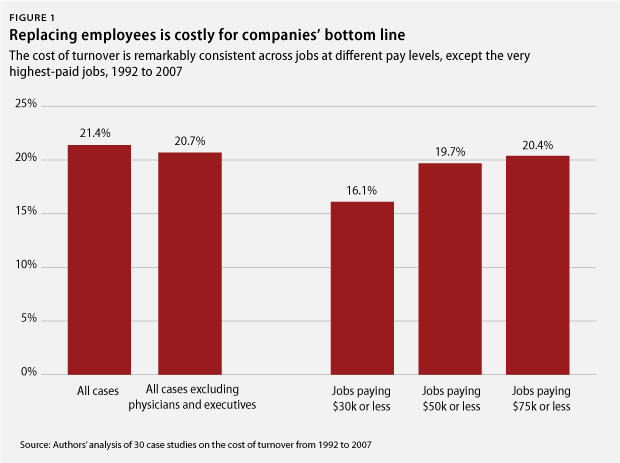

https://datos.bancomundial.org/indicador/PA.NUS.PPPC.RF?end=2023&start=2023&view=bar

Haciendo las conversión a la realidad mexicana, aplicando el factor **PPA**, obtenemos los siguientes rangos:

* El coste de la fuga de los empleados que ganan menos de 336000 MXN al año (28000 al mes) es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 336000-560000 MXN es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 560000-84000 es del 20,4% de su salario
  
🚨 Hay que tener en cuenta que en los casos en los que se trate de personal especializado, los costos totales pueden alcanzar hasta un **213 %** del salario medio de la empresa. <br>
https://blog-empresas.computrabajo.com/costo-de-rotacion/
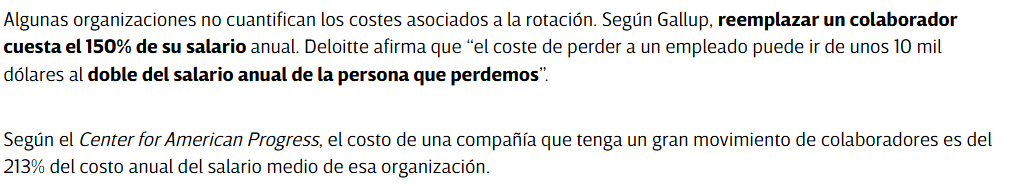
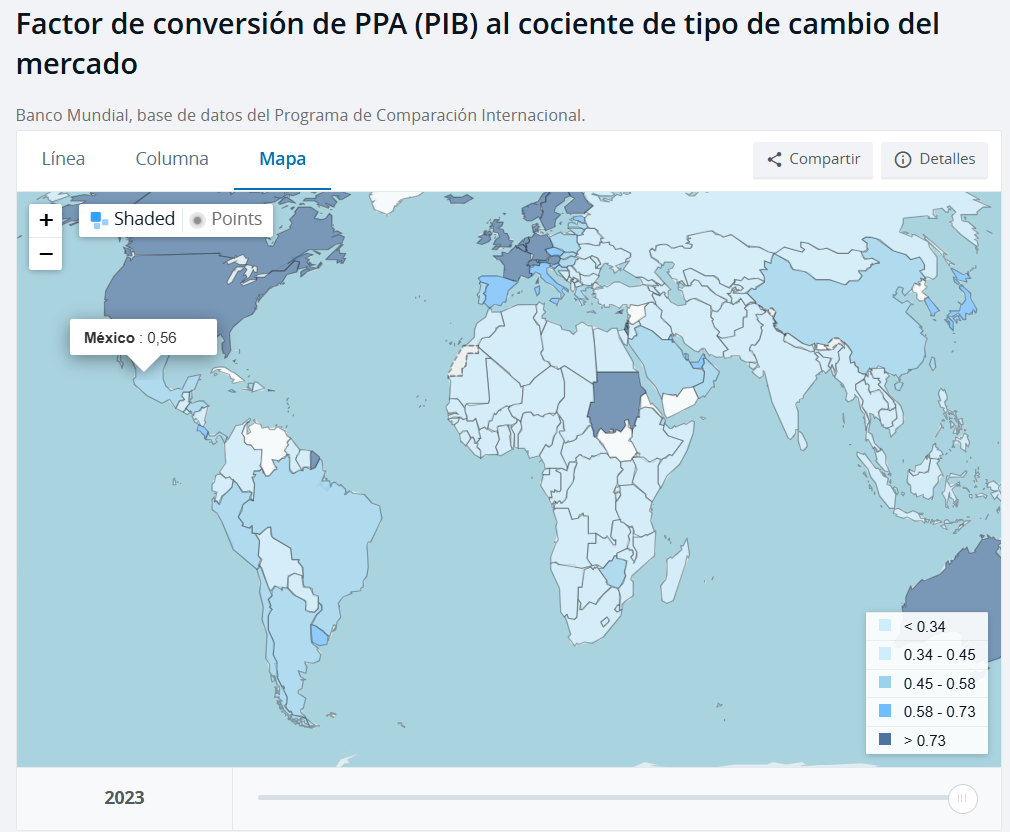

Teniendo en cuenta los factores analizados anteriormente, al ser un análisis basado en la presunción de abandono de un empleado, podemos afirmar que esto puede afectar la moral del empleado y de su entorno en el área y, por tanto, su rendimiento laboral, generando un círculo vicioso que podría desencadenar en mayores tasas de rotación, pérdida de conocimiento institucional y, en última instancia, un impacto negativo en la productividad y el clima organizacional de la empresa. Además, esta situación podría erosionar la confianza en el liderazgo, dificultar la retención de talento y afectar la reputación interna de la organización, complicando aún más la gestión de equipos a largo plazo.<br>

Para hacer un análisis más realista sobre el posible impacto que tendría el abandono de personal en la empresa tomamos como referencia los datos de abandono reales en el anterior año 2024. Para esto nos apoyaremos los datos sobre los empleados que se encuentran Odoo, estos ya han sido descargados del módulo de Empleados.


# Análisis de los costos asociados al abandono de empleados en el año 2024

In [735]:
reg_abandono = pd.read_excel('https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/refs/heads/main/data/raw/employee_turnover.xlsx')

In [736]:
reg_abandono

,correo,genero,puesto,departamento,gerente,fecha_ingreso,fecha_salida,razon_salida,salario_anual,edad_salida,tiempo_empresa
0,andres.reyes@inscomexico.com,Masculino,Metrologo Jr.,Tecnico,Gabriela Martinez Lugo,2024-04-30,2024-07-16,Despido,135600,26,0.210959
1,benjamin.urbano@inscomexico.com,Masculino,Jefe de Laboratorio,Tecnico,Gabriela Martinez Lugo,2005-07-01,2024-01-26,Renuncia,294000,46,18.583562
2,daniel.villegas@inscomexico.com,Masculino,Metrologo,Tecnico,Gabriela Martinez Lugo,2019-01-01,2024-07-31,Renuncia,228000,28,5.583562
3,daniela.beltran@inscomexico.com,Femenino,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-03-17,2024-09-04,Renuncia,156000,25,2.471233
4,dulce@inscomexico.com,Femenino,Supervisor de Laboratorio,Tecnico,Gabriela Martinez Lugo,2018-06-16,2024-08-30,Renuncia,192000,32,6.210959
5,dulce.cruz@inscomexico.com,Femenino,Metrologo Jr.,Tecnico,Gabriela Martinez Lugo,2024-02-28,2024-05-13,Renuncia,105600,24,0.205479
6,erick.barajas@inscomexico.com,Masculino,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-08-08,2024-06-12,Renuncia,204000,31,1.846575
7,francisco.cipriano@inscomexico.com,Masculino,Metrologo Jr.,Tecnico,Gabriela Martinez Lugo,2024-06-27,2024-07-08,Renuncia,156000,28,0.030137
8,german.crisostomo@inscomexico.com,Masculino,Auxiliar de Calidad,Calidad,Martha Elisa Rodriguez Gonzalez,2022-06-01,2024-10-15,Renuncia,135600,29,2.375342
9,irene.salgado@inscomexico.com,Masculino,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-09-30,2024-05-03,Renuncia,135600,27,1.591781


In [737]:
reg_abandono['tiempo_empresa'] = reg_abandono['tiempo_empresa'].round(2)
reg_abandono

,correo,genero,puesto,departamento,gerente,fecha_ingreso,fecha_salida,razon_salida,salario_anual,edad_salida,tiempo_empresa
0,andres.reyes@inscomexico.com,Masculino,Metrologo Jr.,Tecnico,Gabriela Martinez Lugo,2024-04-30,2024-07-16,Despido,135600,26,0.21
1,benjamin.urbano@inscomexico.com,Masculino,Jefe de Laboratorio,Tecnico,Gabriela Martinez Lugo,2005-07-01,2024-01-26,Renuncia,294000,46,18.58
2,daniel.villegas@inscomexico.com,Masculino,Metrologo,Tecnico,Gabriela Martinez Lugo,2019-01-01,2024-07-31,Renuncia,228000,28,5.58
3,daniela.beltran@inscomexico.com,Femenino,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-03-17,2024-09-04,Renuncia,156000,25,2.47
4,dulce@inscomexico.com,Femenino,Supervisor de Laboratorio,Tecnico,Gabriela Martinez Lugo,2018-06-16,2024-08-30,Renuncia,192000,32,6.21
5,dulce.cruz@inscomexico.com,Femenino,Metrologo Jr.,Tecnico,Gabriela Martinez Lugo,2024-02-28,2024-05-13,Renuncia,105600,24,0.21
6,erick.barajas@inscomexico.com,Masculino,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-08-08,2024-06-12,Renuncia,204000,31,1.85
7,francisco.cipriano@inscomexico.com,Masculino,Metrologo Jr.,Tecnico,Gabriela Martinez Lugo,2024-06-27,2024-07-08,Renuncia,156000,28,0.03
8,german.crisostomo@inscomexico.com,Masculino,Auxiliar de Calidad,Calidad,Martha Elisa Rodriguez Gonzalez,2022-06-01,2024-10-15,Renuncia,135600,29,2.38
9,irene.salgado@inscomexico.com,Masculino,Metrologo,Tecnico,Gabriela Martinez Lugo,2022-09-30,2024-05-03,Renuncia,135600,27,1.59


In [738]:
def graficos_categoricos(cat_df):
    columnas = cat_df.columns
    n_vars = len(columnas)
    filas = ceil(n_vars / 2)

    fig = make_subplots(rows=filas, cols=2, subplot_titles=columnas)

    for i, col in enumerate(columnas):
        row = (i // 2) + 1
        col_position = (i % 2) + 1

        conteos = cat_df[col].value_counts()
        #total = conteos.sum()
        porcentajes = (conteos / cat_df.shape[0] * 100).round(2)

        # Añadimos el gráfico de barras con etiquetas de porcentaje
        fig.add_trace(
            go.Bar(
                x=conteos.values,
                y=conteos.index,
                orientation='h',
                name=col,
                text=[f"{p}%" for p in porcentajes],
                textposition='auto',
                #marker=dict(color='steelblue')
            ),
            row=row,
            col=col_position
        )

    fig.update_layout(
        height=filas * 400,
        width=1000,
        title_text="Distribución de Variables Categóricas",
        showlegend=False
    )

    fig.update_annotations(font_size=12, font=dict(color="black"))
    fig.show()


In [739]:
reg_abandono.columns

Index(['correo', 'genero', 'puesto', 'departamento', 'gerente',
       'fecha_ingreso', 'fecha_salida', 'razon_salida', 'salario_anual',
       'edad_salida', 'tiempo_empresa'],
      dtype='object')

In [740]:
categ = reg_abandono[['puesto','genero', 'gerente', 'departamento', 'razon_salida']]

In [741]:
graficos_categoricos(categ)

# Análisis Preliminar de la Rotación de Personal en 2024

## Resumen General

El análisis de los empleados que abandonaron la empresa en 2024 muestra que la **rotación fue mayoritariamente voluntaria (83.33% renuncias)**. Los abandonos se concentran notablemente en el departamento **Técnico (70.83%)**, afectando de forma desproporcionada al rol de **Metrólogo (50.0% de las salidas)** y estando fuertemente asociados a la gerente **Gabriela Martinez Lugo (70.83% de los abandonos)**. La mayoría del personal que abandonó la empresa fue de género **masculino (75.0%)**.

## Hallazgos Clave

* **Razón de Salida:** La **Renuncia** (83.33%) es la causa principal, frente al Despido (16.67%).
* **Departamento:** El departamento **Técnico** concentra la gran mayoría de las salidas (70.83%).
* **Gerente:** **Gabriela Martinez Lugo** está asociada a la mayor proporción de abandonos (70.83%).
* **Puesto:** El rol de **Metrólogo** tuvo una rotación destacada (50.0% de las salidas).
* **Género:** El 75.0% de los empleados que abandonaron fueron **Masculinos**.

## Conclusión

Los datos preliminares señalan áreas específicas (Departamento Técnico, Rol Metrólogo, equipo de G. Martinez Lugo) y una alta tasa de abandono voluntario, sugiriendo la necesidad urgente de investigar las causas subyacentes para implementar estrategias de retención focalizadas.

In [742]:
abandono_number = reg_abandono.select_dtypes(include='number')
abandono_number.describe()

,salario_anual,edad_salida,tiempo_empresa
count,24.000000,24.000000,24.000000
mean,170050.000000,29.958333,2.873333
std,53326.793983,5.721654,3.860547
min,96000.000000,24.000000,0.030000
25%,135600.000000,26.000000,0.397500
50%,156000.000000,28.000000,1.720000
75%,195000.000000,32.250000,3.475000
max,294000.000000,46.000000,18.580000


Media Salario Anual: 170050.00
Media Edad Salida: 29.96
Media Tiempo en Empresa: 2.87


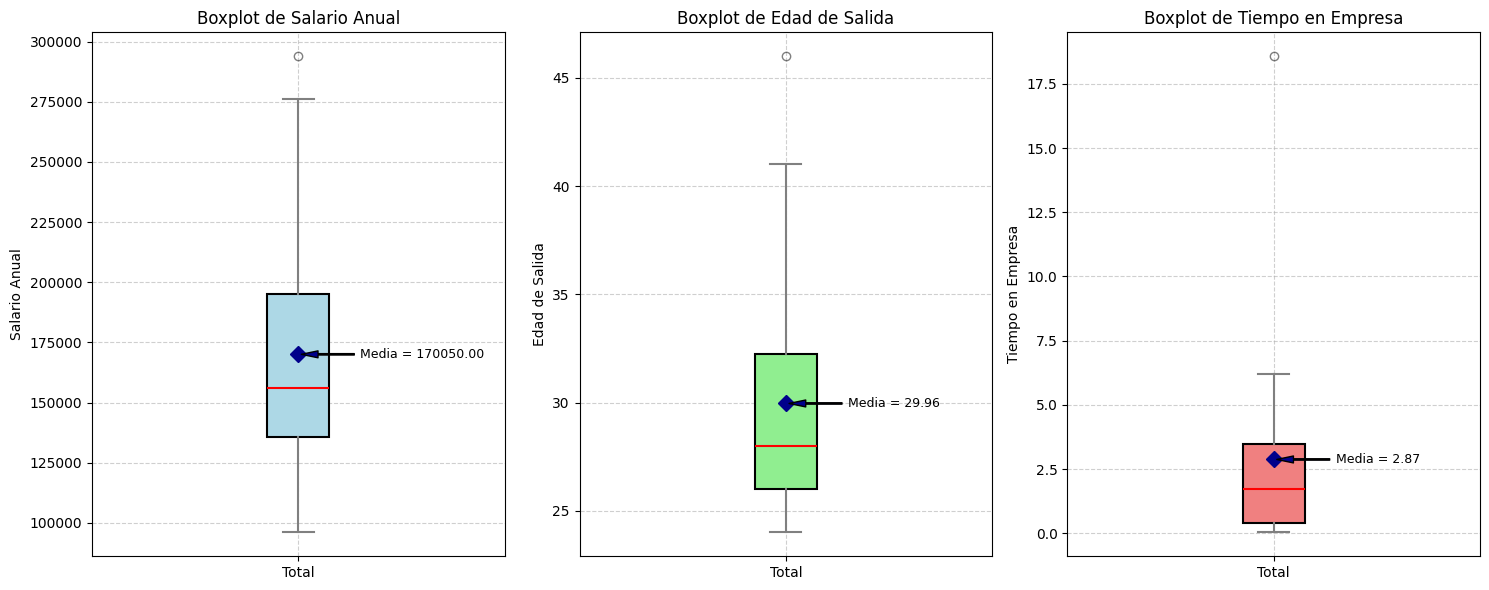

In [743]:
# --- Calcular las medias de cada variable ---
# Usamos .mean() para calcular la media. pandas maneja los NaNs por defecto en mean()
media_salario = abandono_number['salario_anual'].mean()
media_edad = abandono_number['edad_salida'].mean()
media_tiempo = abandono_number['tiempo_empresa'].mean()

print(f"Media Salario Anual: {media_salario:.2f}")
print(f"Media Edad Salida: {media_edad:.2f}")
print(f"Media Tiempo en Empresa: {media_tiempo:.2f}")


# --- TU CÓDIGO ORIGINAL PARA CREAR Y CONFIGURAR LOS BOXPLOTS ---
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Boxplot 1: Salario Anual (en ax[0])
bp1_elements = ax[0].boxplot(abandono_number['salario_anual'].dropna(), patch_artist=True, showfliers=True)
ax[0].set_title('Boxplot de Salario Anual')
ax[0].set_ylabel('Salario Anual')
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Total'])
ax[0].grid(True, linestyle='--', alpha=0.6)

# Boxplot 2: Edad de Salida (en ax[1])
bp2_elements = ax[1].boxplot(abandono_number['edad_salida'].dropna(), patch_artist=True, showfliers=True)
ax[1].set_title('Boxplot de Edad de Salida')
ax[1].set_ylabel('Edad de Salida')
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Total'])
ax[1].grid(True, linestyle='--', alpha=0.6)

# Boxplot 3: Tiempo en Empresa (en ax[2])
bp3_elements = ax[2].boxplot(abandono_number['tiempo_empresa'].dropna(), patch_artist=True, showfliers=True)
ax[2].set_title('Boxplot de Tiempo en Empresa')
ax[2].set_ylabel('Tiempo en Empresa')
ax[2].set_xticks([1])
ax[2].set_xticklabels(['Total'])
ax[2].grid(True, linestyle='--', alpha=0.6)


# --- Bloque Opcional de Coloreado (tal como lo tenías) ---
colores_caja = ['lightblue', 'lightgreen', 'lightcoral']
all_boxplot_elements = [bp1_elements, bp2_elements, bp3_elements]
for i, boxplot_elements in enumerate(all_boxplot_elements):
    for box in boxplot_elements['boxes']:
        box.set(color='black', linewidth=1.5)
        box.set(facecolor=colores_caja[i])
    for median in boxplot_elements['medians']:
        median.set(color='red', linewidth=1.5)
    for whisker in boxplot_elements['whiskers']:
         whisker.set(color='gray', linewidth=1.5)
    for cap in boxplot_elements['caps']:
         cap.set(color='gray', linewidth=1.5)
    for flier in boxplot_elements['fliers']:
         flier.set(marker='o', color='red', alpha=0.5)


# --- AÑADIR LAS MEDIAS Y SUS ANOTACIONES ---

# La posición X para cada boxplot es 1
box_x_position = 1

# Añadir Media al Boxplot 1 (Salario Anual)
# Plotear un marcador para la media
ax[0].plot(box_x_position, media_salario, 'D', color='darkblue', markersize=8, label='Media') # 'D' es un diamante
# Añadir anotación para la media
ax[0].annotate(f'Media = {media_salario:.2f}',
               xy=(box_x_position, media_salario),       # Punto a anotar
               xytext=(box_x_position + 0.15, media_salario), # Posición del texto (ligeramente a la derecha)
               arrowprops=dict(facecolor='darkblue', shrink=0.05, width=1, headwidth=5),
               ha='left', va='center', fontsize=9)
# ax[0].legend() # Opcional: Mostrar leyenda si usaste label en el plot de la media

# Añadir Media al Boxplot 2 (Edad de Salida)
ax[1].plot(box_x_position, media_edad, 'D', color='darkblue', markersize=8, label='Media')
ax[1].annotate(f'Media = {media_edad:.2f}',
               xy=(box_x_position, media_edad),
               xytext=(box_x_position + 0.15, media_edad),
               arrowprops=dict(facecolor='darkblue', shrink=0.05, width=1, headwidth=5),
               ha='left', va='center', fontsize=9)
# ax[1].legend()

# Añadir Media al Boxplot 3 (Tiempo en Empresa)
ax[2].plot(box_x_position, media_tiempo, 'D', color='darkblue', markersize=8, label='Media')
ax[2].annotate(f'Media = {media_tiempo:.2f}',
               xy=(box_x_position, media_tiempo),
               xytext=(box_x_position + 0.15, media_tiempo),
               arrowprops=dict(facecolor='darkblue', shrink=0.05, width=1, headwidth=5),
               ha='left', va='center', fontsize=9)
# ax[2].legend()



# --- Ajustar el diseño general ---
plt.tight_layout()

# --- Mostrar la figura ---
plt.show()

- En los tres casos se puede notar que la media es mayor con respecto a las medianas, lo que indica que los datos están sesgados a la derecha, es decir, hay pocos datos muy grandes que influyen en el promedio de cada uno, aunque hay que notar que en el caso de la ``Edad de Salida`` la mediana y la media son más cercanos, lo que indica que la relación es más simétrica.
- En los tres casos se encuentran valores atípicos, por lo que sería recomendable analizar qué pasa si quitamos estos datos del modelo.

## **Análisis individual de las tres variables**

### Análisis de ``edad_salida``

In [744]:
abandono_number['edad_salida'].describe().to_frame()

,edad_salida
count,24.000000
mean,29.958333
std,5.721654
min,24.000000
25%,26.000000
50%,28.000000
75%,32.250000
max,46.000000


In [745]:
edad_salida_series = reg_abandono['edad_salida']

# Calcular los cuartiles y outliers
Q0 = edad_salida_series.min()
Q1 = edad_salida_series.quantile(0.25)
Mediana = edad_salida_series.median()
Q3 = edad_salida_series.quantile(0.75)
IQR = Q3 - Q1
Q4 = Mediana + 1.5 * IQR
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR
outliers = edad_salida_series[(edad_salida_series < Limite_Inferior) | (edad_salida_series > Limite_Superior)]

# Crear el boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    y=edad_salida_series,
    name="Edad de salida",
    boxpoints='outliers',
    marker_color='skyblue',
    line_color='darkblue',
    boxmean=True  # muestra la media con un punto
))

# Agregar líneas de referencia y anotaciones
for valor, nombre in [(Q0, "Q0"), (Q1, "Q1"), (Mediana, "Mediana"), (Q3, "Q3"), (Q4, "Q4")]:
    fig.add_annotation(
        x=0,
        y=valor,
        text=f"{nombre} = {valor:.2f}",
        showarrow=False,
        yshift=10 if nombre != "Q0" else -10,
        font=dict(color="black")
    )

# Anotar outliers
for val in outliers:
    fig.add_annotation(
        x=0,
        y=val,
        text=f"Atípico: {val:.2f}",
        showarrow=False,
        yshift=10,
        font=dict(color="red")
    )

# Ajustes finales
fig.update_layout(
    title="Boxplot de Edad de Salida (Empleados que abandonaron en 2024)",
    yaxis_title="Edad de Salida (años)",
    xaxis=dict(showticklabels=False),
    height=600,
    width=800
)
fig.show()


In [746]:
# Eliminamos el valor atípico para tener una mejor idea de los descriptivos
aban_sin_max_edad = abandono_number['edad_salida'].drop(abandono_number['edad_salida'].idxmax()) if abandono_number['edad_salida'].max() > 41.1 else reg_abandono['edad_salida']


In [747]:
edad_salida_series = aban_sin_max_edad

# Calcular los cuartiles y outliers
Q0 = edad_salida_series.min()
Q1 = edad_salida_series.quantile(0.25)
Mediana = edad_salida_series.median()
Q3 = edad_salida_series.quantile(0.75)
IQR = Q3 - Q1
Q4 = Mediana + 1.5 * IQR
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR
outliers = edad_salida_series[(edad_salida_series < Limite_Inferior) | (edad_salida_series > Limite_Superior)]

# Crear el boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    y=edad_salida_series,
    name="Edad de salida",
    boxpoints='outliers',
    marker_color='skyblue',
    line_color='darkblue',
    boxmean=True  # muestra la media con un punto
))

# Agregar líneas de referencia y anotaciones
for valor, nombre in [(Q0, "Q0"), (Q1, "Q1"), (Mediana, "Mediana"), (Q3, "Q3")]:
    fig.add_annotation(
        x=0,
        y=valor,
        text=f"{nombre} = {valor:.2f}",
        showarrow=False,
        yshift=10 if nombre != "Q0" else -10,
        font=dict(color="black")
    )

# Anotar outliers
for val in outliers:
    fig.add_annotation(
        x=0,
        y=val,
        text=f"Atípico: {val:.2f}",
        showarrow=False,
        yshift=10,
        font=dict(color="red")
    )

# Ajustes finales
fig.update_layout(
    title="Boxplot de Edad de Salida (Empleados que abandonaron en 2024)",
    yaxis_title="Edad de Salida (años)",
    xaxis=dict(showticklabels=False),
    height=600,
    width=800
)
fig.show()


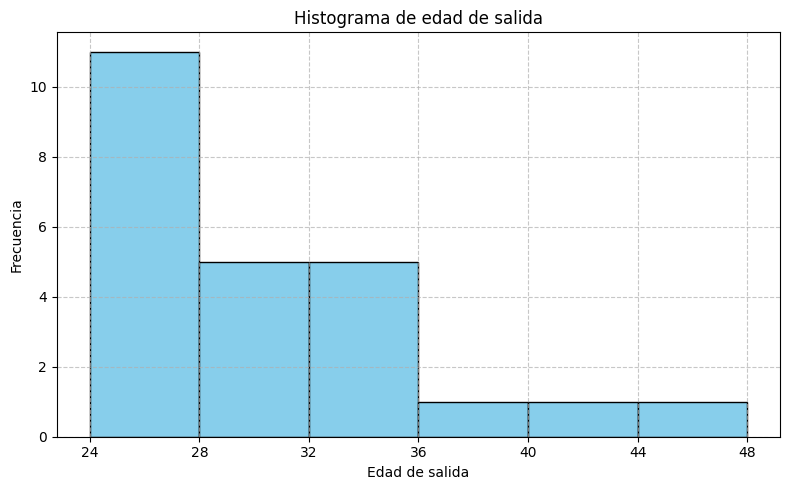

In [748]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(24, 52, 4)  # De 0 a 20 con paso de 1

plt.figure(figsize=(8, 5))
plt.hist(abandono_number['edad_salida'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Histograma de edad de salida')
plt.xlabel('Edad de salida')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins)

plt.tight_layout()
#plt.show(block=True)


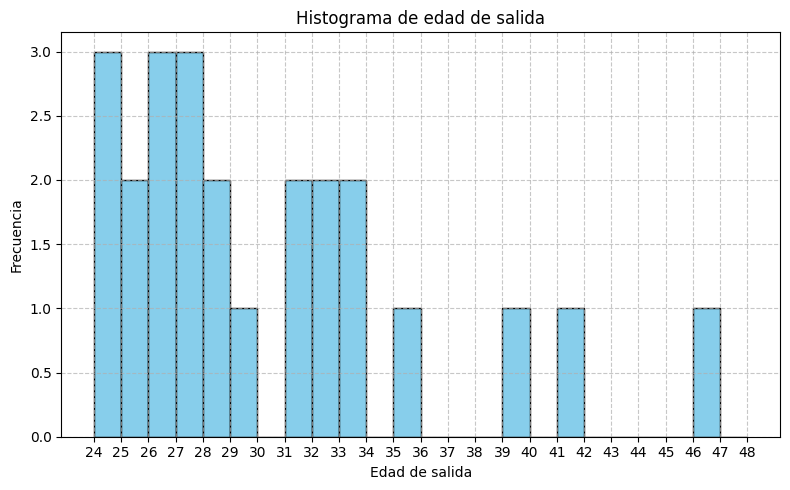

In [749]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(24, 49, 1)  # De 0 a 20 con paso de 1

plt.figure(figsize=(8, 5))
plt.hist(abandono_number['edad_salida'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Histograma de edad de salida')
plt.xlabel('Edad de salida')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins)

plt.tight_layout()
#plt.show(block=True)


- Con respecto a la edad de los empleados que abandonaron la empresa en el año 2024 podemos concluir que el grueso de estos se concentra en un rango de edad entre 24 y 28 años **[24;28]**, con casi un **50%** del total de empleados.
- El resto de los empleados se concentra entre los 29 y 34 años, con algunos casos aislados con una edad mayor.

### Análisis de ``salario_anual``

In [750]:
abandono_number['salario_anual'].describe().to_frame()

,salario_anual
count,24.000000
mean,170050.000000
std,53326.793983
min,96000.000000
25%,135600.000000
50%,156000.000000
75%,195000.000000
max,294000.000000


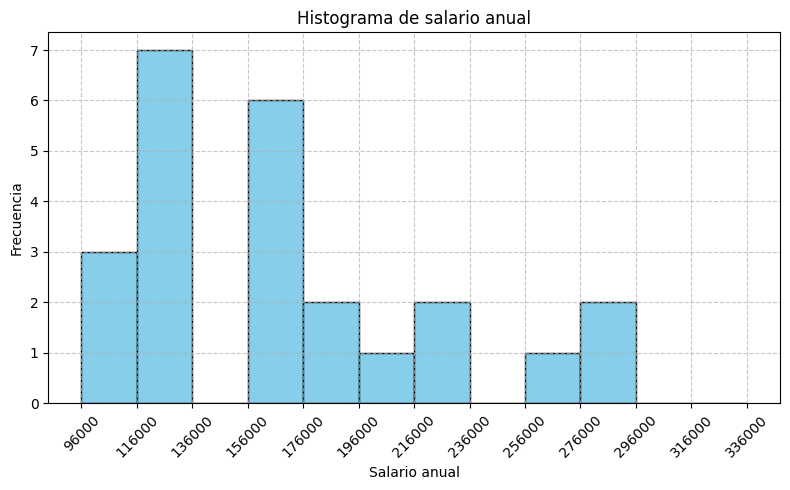

In [751]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(abandono_number['salario_anual'].min(), abandono_number['salario_anual'].max()+50000, 20000)  # De 0 a 20 con paso de 1

plt.figure(figsize=(8, 5))
plt.hist(abandono_number['salario_anual'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Histograma de salario anual')
plt.xlabel('Salario anual')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins, rotation=45)

plt.tight_layout()
#plt.show(block=True)


In [752]:
salario_anual_series = reg_abandono['salario_anual']

# Calcular los cuartiles y outliers
Q0 = salario_anual_series.min()
Q1 = salario_anual_series.quantile(0.25)
Mediana = salario_anual_series.median()
Q3 = salario_anual_series.quantile(0.75)
IQR = Q3 - Q1
Q4 = Mediana + 1.5 * IQR
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR
outliers = salario_anual_series[(salario_anual_series < Limite_Inferior) | (salario_anual_series > Limite_Superior)]

# Crear el boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    y=salario_anual_series,
    name="Salario anual",
    boxpoints='outliers',
    marker_color='skyblue',
    line_color='darkblue',
    boxmean=True  # muestra la media con un punto
))

# Agregar líneas de referencia y anotaciones
for valor, nombre in [(Q0, "Q0"), (Q1, "Q1"), (Mediana, "Mediana"), (Q3, "Q3")]:
    fig.add_annotation(
        x=0,
        y=valor,
        text=f"{nombre} = {valor:.2f}",
        showarrow=False,
        yshift=15 if nombre != "Q0" else -10,
        font=dict(color="black")
    )

# Anotar outliers
for val in outliers:
    fig.add_annotation(
        x=0,
        y=val,
        text=f"Atípico: {val:.2f}",
        showarrow=False,
        yshift=10,
        font=dict(color="red")
    )

# Ajustes finales
fig.update_layout(
    title="Boxplot de Salario Anual (Empleados que abandonaron en 2024)",
    yaxis_title="Salario Anual (años)",
    xaxis=dict(showticklabels=False),
    height=600,
    width=800
)
print(outliers.dtype)
fig.show()


int64


In [753]:
# Eliminamos el valor atípico para tener una mejor idea de los descriptivos
aban_sin_max_salario = abandono_number['salario_anual'].drop(abandono_number['salario_anual'].idxmax()) if abandono_number['salario_anual'].max() > 275000 else reg_abandono['salario_anual']


In [754]:
salario_anual_series = aban_sin_max_salario

# Calcular los cuartiles y outliers
Q0 = salario_anual_series.min()
Q1 = salario_anual_series.quantile(0.25)
Mediana = salario_anual_series.median()
Q3 = salario_anual_series.quantile(0.75)
IQR = Q3 - Q1
Q4 = Mediana + 1.5 * IQR
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR
outliers = salario_anual_series[(salario_anual_series < Limite_Inferior) | (salario_anual_series > Limite_Superior)]

# Crear el boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    y=salario_anual_series,
    name="Salario anual",
    boxpoints='outliers',
    marker_color='skyblue',
    line_color='darkblue',
    boxmean=True  # muestra la media con un punto
))

# Agregar líneas de referencia y anotaciones
for valor, nombre in [(Q0, "Q0"), (Q1, "Q1"), (Mediana, "Mediana"), (Q3, "Q3")]:
    fig.add_annotation(
        x=0,
        y=valor,
        text=f"{nombre} = {valor:.2f}",
        showarrow=False,
        yshift=15 if nombre != "Q0" else -10,
        font=dict(color="black")
    )

# Anotar outliers
for val in outliers:
    fig.add_annotation(
        x=0,
        y=val,
        text=f"Atípico: {val:.2f}",
        showarrow=False,
        yshift=10,
        font=dict(color="red")
    )

# Ajustes finales
fig.update_layout(
    title="Boxplot de Salario Anual (Empleados que abandonaron en 2024)",
    yaxis_title="Salario Anual (años)",
    xaxis=dict(showticklabels=False),
    height=600,
    width=800
)
print(outliers.dtype)
fig.show()


int64


- Dado que aparece un nuevo outlier en el nuevo conjunto de datos, analizamos un gráfico de violín para tener una mejo idea del conjunto total.

In [755]:
# --- Crear la figura ---
fig = go.Figure()

# --- Añadir el trace de Violin ---
# Usamos go.Violin para crear el diagrama de violín
fig.add_trace(go.Violin(
    y=salario_anual_series.dropna(), # Pasa la Serie de datos. dropna() para manejar nulos.
    name="Salario Anual",            # Nombre de la traza
    box_visible=True,         # <--- Muestra la caja interna (Mediana y Cuartiles)
    meanline_visible=True,    # <--- Muestra la línea de la Media
    # quartiles_visible=True, # Opcional: muestra líneas solo para los cuartiles
    # Ajustes visuales del violín
    fillcolor='skyblue',
    line_color='darkblue',
    opacity=0.6, # Ajusta la transparencia si hay varios violines
    # Opcional: mostrar puntos de datos
    # points='all', # Muestra todos los puntos (puede ser lento)
    # points='outliers', # Muestra solo los puntos identificados como atípicos (como en boxplot por defecto)
    # pointpos=0, # Posición de los puntos (0 es el centro del violín)
    # jitter=0.3, # Dispersión horizontal de los puntos
    # marker=dict(size=3, color='red') # Apariencia de los puntos
))

# --- Ajustes de diseño generales de la figura ---
fig.update_layout(
    title="Gráfico de Violín de Salario Anual (Empleados que abandonaron en 2024)",
    yaxis_title="Salario Anual", # Etiqueta del eje Y
    xaxis=dict(showticklabels=False), # No mostrar etiquetas en el eje X para un solo violín
    height=600,
    width=800,
    # Opcional: Mostrar rejilla en el eje Y
    # yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=1)
)

# --- Mostrar el gráfico ---
fig.show()

* **Distribución del Salario Anual (Empleados que Abandonaron en 2024):** La mayor **concentración de salarios** entre los empleados que abandonaron en 2024 se sitúa en el rango intercuartílico, específicamente **entre Q1 (135.6k) y Q3 (189k)**, con la **mayor densidad** (la parte más ancha del violín) alrededor de la **Mediana (156k)**. La distribución exhibe un claro **sesgo a la derecha**, confirmado por el hecho de que la **Media (165.18k)** es superior a la Mediana, y por la **cola visualmente más larga y delgada** que se extiende hacia valores salariales más altos (alcanzando un Máximo de 276k), lo cual indica que hay empleados con salarios significativamente mayores que influyen en el promedio, aunque son menos numerosos que los de rangos salariales inferiores.

### Análisis de ``tiempo_empresa``

In [756]:
abandono = abandono_number['tiempo_empresa'].describe().to_frame()
abandono

,tiempo_empresa
count,24.000000
mean,2.873333
std,3.860547
min,0.030000
25%,0.397500
50%,1.720000
75%,3.475000
max,18.580000


In [757]:
tiempo_empresa_series = reg_abandono['tiempo_empresa']

# Calcular los cuartiles y outliers
Q0 = tiempo_empresa_series.min()
Q1 = tiempo_empresa_series.quantile(0.25)
Mediana = tiempo_empresa_series.median()
Q3 = tiempo_empresa_series.quantile(0.75)
IQR = Q3 - Q1
Q4 = Mediana + 1.5 * IQR
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR
outliers = tiempo_empresa_series[(tiempo_empresa_series < Limite_Inferior) | (tiempo_empresa_series > Limite_Superior)]

# Crear el boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    y=tiempo_empresa_series,
    name="Tiempo en Empresa",
    boxpoints='outliers',
    marker_color='skyblue',
    line_color='darkblue',
    boxmean=True  # muestra la media con un punto
))

# Agregar líneas de referencia y anotaciones
for valor, nombre in [(Q0, "Q0"), (Q1, "Q1"), (Mediana, "Mediana"), (Q3, "Q3"), (Q4, "Q4")]:
    fig.add_annotation(
        x=0,
        y=valor,
        text=f"{nombre} = {valor:.2f}",
        showarrow=False,
        yshift=10 if nombre != "Q0" else -10,
        font=dict(color="black")
    )

# Anotar outliers
for val in outliers:
    fig.add_annotation(
        x=0,
        y=val,
        text=f"Atípico: {val:.2f}",
        showarrow=False,
        yshift=10,
        font=dict(color="red")
    )

# Ajustes finales
fig.update_layout(
    title="Boxplot de Tiempo en Empresa (Empleados que abandonaron en 2024)",
    yaxis_title="Tiempo en Empresa (años)",
    xaxis=dict(showticklabels=False),
    height=600,
    width=800
)
fig.show()


In [758]:
# Eliminamos el valor atípico para tener una mejor idea de los descriptivos
aban_sin_max_tiempo = abandono_number['tiempo_empresa'].drop(abandono_number['tiempo_empresa'].idxmax()) if abandono_number['tiempo_empresa'].max() > 15 else reg_abandono['tiempo_empresa']


In [759]:
aban_sin_max_tiempo.describe().to_frame()

,tiempo_empresa
count,23.000000
mean,2.190435
std,1.969800
min,0.030000
25%,0.365000
50%,1.590000
75%,3.320000
max,6.210000


In [760]:
tiempo_empresa_series = aban_sin_max_tiempo
# Calcular los cuartiles y outliers
Q0 = tiempo_empresa_series.min()
Q1 = tiempo_empresa_series.quantile(0.25)
Mediana = tiempo_empresa_series.median()
Q3 = tiempo_empresa_series.quantile(0.75)
IQR = Q3 - Q1
Q4 = Mediana + 1.5 * IQR
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR
outliers = tiempo_empresa_series[(tiempo_empresa_series < Limite_Inferior) | (tiempo_empresa_series > Limite_Superior)]

# Crear el boxplot
fig = go.Figure()

fig.add_trace(go.Box(
    y=tiempo_empresa_series,
    name="Tiempo en Empresa",
    boxpoints='outliers',
    marker_color='skyblue',
    line_color='darkblue',
    boxmean=True  # muestra la media con un punto
))

# Agregar líneas de referencia y anotaciones
for valor, nombre in [(Q0, "Q0"), (Q1, "Q1"), (Mediana, "Mediana"), (Q3, "Q3"), (Q4, "Q4")]:
    fig.add_annotation(
        x=0,
        y=valor,
        text=f"{nombre} = {valor:.2f}",
        showarrow=False,
        yshift=7 if nombre != "Q0" else -10,
        font=dict(color="black")
    )

# Anotar outliers
for val in outliers:
    fig.add_annotation(
        x=0,
        y=val,
        text=f"Atípico: {val:.2f}",
        showarrow=False,
        yshift=10,
        font=dict(color="red")
    )

# Ajustes finales
fig.update_layout(
    title="Boxplot de Tiempo en Empresa (Empleados que abandonaron en 2024)",
    yaxis_title="Tiempo en Empresa (años)",
    xaxis=dict(showticklabels=False),
    height=600,
    width=800
)
fig.show()


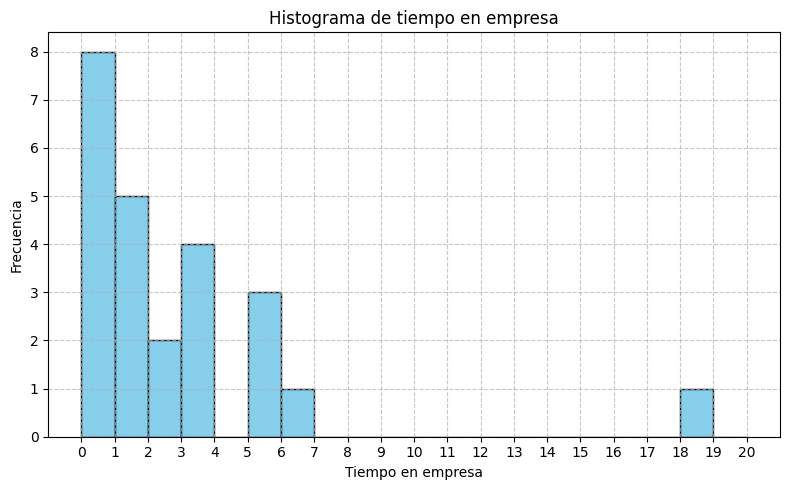

In [761]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(0, 21, 1)  # De 0 a 20 con paso de 1

plt.figure(figsize=(8, 5))
plt.hist(reg_abandono['tiempo_empresa'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Histograma de tiempo en empresa')
plt.xlabel('Tiempo en empresa')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins)

plt.tight_layout()
#plt.show(block=True)


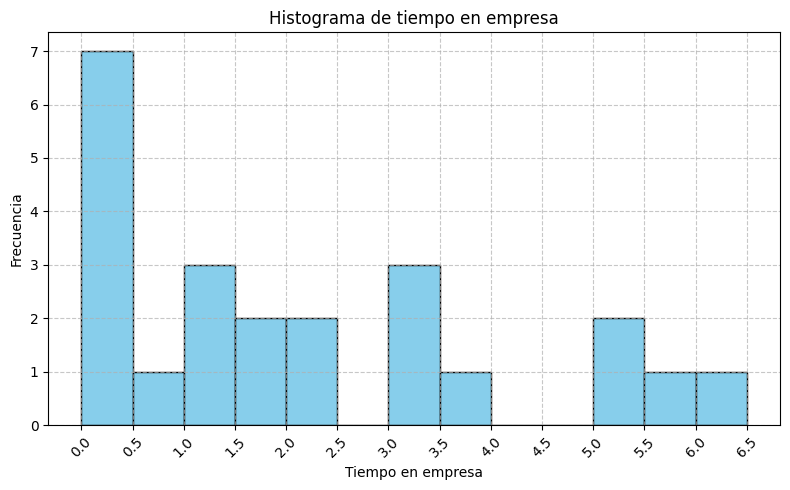

In [762]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(0, 7, 0.5)  # De 0 a 20 con paso de 1

plt.figure(figsize=(8, 5))
plt.hist(aban_sin_max_tiempo, bins=bins, edgecolor='black', color='skyblue')
plt.title('Histograma de tiempo en empresa')
plt.xlabel('Tiempo en empresa')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins, rotation=45)

plt.tight_layout()
#plt.show(block=True)


## 🚨🚨 Comparación entre ``tiempo_empresa`` (para los datos de los empleados que abandonaron en el 2024) y ``antigüedad`` (para los empleados encuestados este año 2025)

In [763]:
df[['abandono', 'antigüedad']]

,abandono,antigüedad
0,1,70
1,1,109
2,1,29
3,1,34
4,0,254
5,0,34
6,0,8
7,0,252
8,0,119
9,1,36


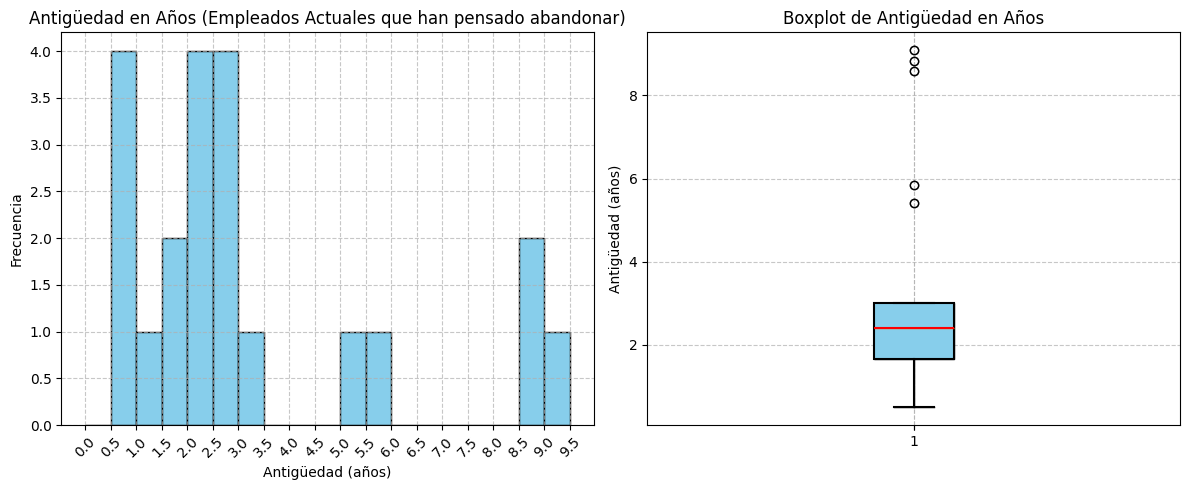

       antigüedad
count   21.000000
mean     3.198413
std      2.722014
min      0.500000
25%      1.666667
50%      2.416667
75%      3.000000
max      9.083333


In [764]:
# Los datos que realmente graficaremos (en años)
#data_to_plot_años = df_num['antigüedad'] / 12
data_to_plot_años = df.loc[df['abandono'] == 1]['antigüedad']/12

# --- Configuración de los bins para el histograma (tal como la definiste) ---
bins = np.arange(0, 10, 0.5) # De 0 a 23 años con paso de 1 año


# --- Crear la figura y los dos subgráficos (1 fila, 2 columnas) ---
# fig es la figura completa, ax es un array con los objetos Axes [ax_izquierda, ax_derecha]
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # Ajusta figsize para que quepan bien lado a lado


# --- Subgráfico de la Izquierda: Histograma ---
# Usamos ax[0] para plotear en el primer subgráfico
ax[0].hist(data_to_plot_años, bins=bins, edgecolor='black', color='skyblue')

# Configuración del histograma (copiada de tu código, aplicada a ax[0])
ax[0].set_title('Antigüedad en Años (Empleados Actuales que han pensado abandonar)') # Título para el histograma
ax[0].set_xlabel('Antigüedad (años)') # Etiqueta para el eje X del histograma
ax[0].set_ylabel('Frecuencia') # Etiqueta para el eje Y del histograma
ax[0].grid(True, linestyle='--', alpha=0.7) # Rejilla
ax[0].set_xticks(bins) # Asegurar que los ticks estén en los bordes de los bins
ax[0].set_xticklabels([str(b) for b in bins]) # Etiquetar los ticks con números enteros
ax[0].tick_params(axis='x', rotation=45) # Rotar etiquetas si se superponen


# --- Subgráfico de la Derecha: Boxplot ---
# Usamos ax[1] para plotear en el segundo subgráfico
# La función boxplot de matplotlib espera una lista o array de datos (o una lista de listas si son múltiples cajas)
ax[1].boxplot(data_to_plot_años, patch_artist=True) # patch_artist=True para que la caja se rellene de color

# Configuración del boxplot
ax[1].set_title('Boxplot de Antigüedad en Años') # Título para el boxplot
ax[1].set_ylabel('Antigüedad (años)') # El eje Y del boxplot es la escala de la variable
# En un boxplot simple, el eje X no tiene muchas categorías, a menudo solo una.
ax[1].set_xticks([1]) # Colocar un tick en la posición 1 (donde se dibuja el box por defecto)
ax[1].set_xticklabels(['Total']) # Etiquetar ese tick como 'Total' o similar
ax[1].grid(True, linestyle='--', alpha=0.7) # Rejilla

# Opcional: Darle color a la caja del boxplot manualmente si patch_artist=True
boxplot = ax[1].boxplot(data_to_plot_años, patch_artist=True)
for box in boxplot['boxes']:
    # Cambiar color de la caja
    box.set(color='black', linewidth=1.5) # Color del borde de la caja
    box.set(facecolor='skyblue') # Color de relleno de la caja

for whisker in boxplot['whiskers']:
    whisker.set(color='black', linewidth=1.5) # Color y ancho de los bigotes

for cap in boxplot['caps']:
    cap.set(color='black', linewidth=1.5) # Color y ancho de los extremos de los bigotes

for median in boxplot['medians']:
    median.set(color='red', linewidth=1.5) # Color y ancho de la línea de la mediana

for flier in boxplot['fliers']: # 'fliers' son los puntos atípicos
    flier.set(marker='o', color='red', alpha=0.5) # Marcador y color para atípicos


# --- Ajustar el diseño para evitar superposiciones ---
plt.tight_layout()

# --- Mostrar la figura con ambos subgráficos ---
plt.show()

print(data_to_plot_años.describe().to_frame())

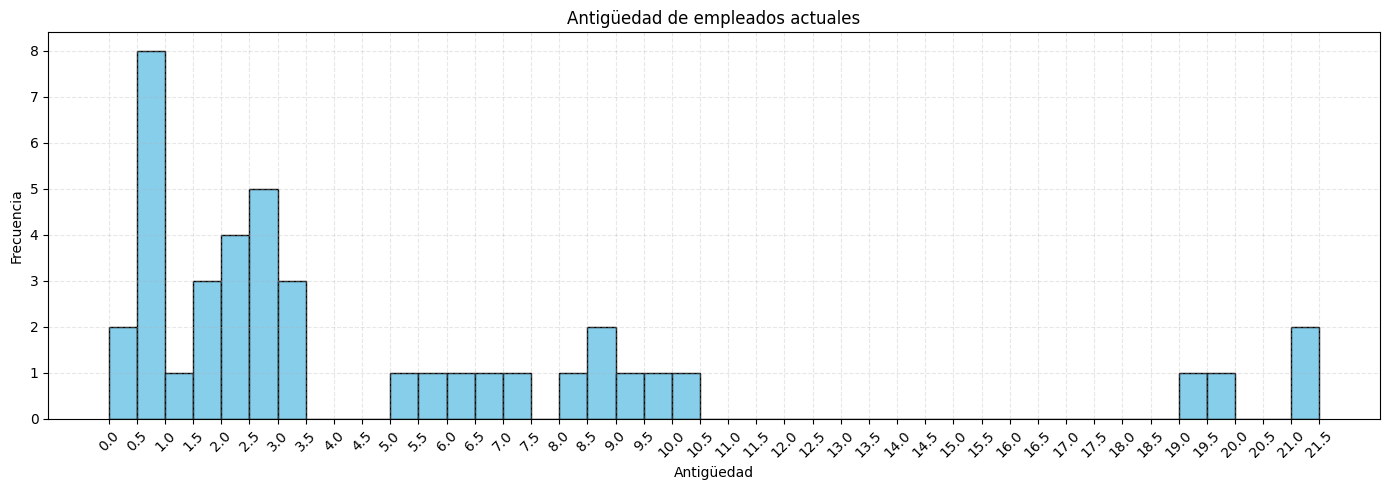

In [765]:
%matplotlib inline
# Crear histograma con 20 bins de tamaño 1
bins = np.arange(0, 22, 0.5)  # De 0 a 20 con paso de 1

plt.figure(figsize=(14, 5))
plt.hist(df_num['antigüedad']/12, bins=bins, edgecolor='black', color='skyblue')
plt.title('Antigüedad de empleados actuales')
plt.xlabel('Antigüedad')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(bins, rotation=45)

plt.tight_layout()
#plt.show(block=True)

## 🧠 Insights Principales
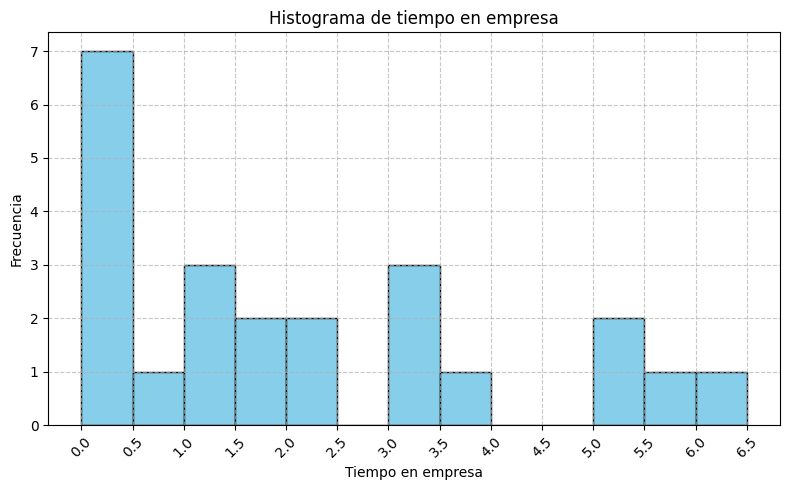
### 📉 **Rotación Hiperconcentrada en el Primer Semestre**  
- **75% de las salidas del primer año** (7 empleados) ocurren en **los primeros 6 meses**.  
- Esto revela que la decisión de abandonar se toma en etapas tempranas, sugiriendo fallas críticas en **onboarding, adaptación cultural o expectativas no gestionadas**.  

### 📈 **Dos Picos Críticos en los Primeros Años**  
1. **Primer pico (0-0.5 años):** Máxima rotación por desajustes iniciales.  
2. **Segundo pico (1.0-2.5 años):** Frecuencia de 7.0 empleados, vinculado seguramente a desafíos post-integracionales: falta de crecimiento, burnout o promociones incumplidas.  

### ↘️ **Reducción Gradual Hasta los 6 Años**  
- La rotación disminuye progresivamente (2.0-3.0 empleados cada 6 meses), pero persiste hasta los 6 años.  
- Indica que incluso empleados con experiencia media abandonan si no hay **planes de desarrollo continuo**.  

### 🎯 **Sesgo Extremo Hacia Baja Antigüedad**  
- **91.7% de las salidas** ocurren antes de los 6 años, con **33.3% en el primer año**.  
- Refuerza un **problema sistémico en retener talento joven**, aumentando costos de reclutamiento y pérdida de conocimiento.  

---

## 📌 Recomendaciones Estratégicas  

### 🔴 **Acciones Inmediatas (0-6 meses)**  
- **Programa "Primeros 90 Días":**  
  - Mentorías diarias/semanales con líderes de equipo.  
  - Encuestas de clima a los 30, 60 y 90 días para detectar frustraciones.  
  - Bono de retención al cumplir 6 meses (ej: 5% del salario).  

### 🟠 **Fortalecer Retención en 1.5-3 Años**  
- **Paquete de Desarrollo Acelerado:**  
  - Ofertas de promoción interna al cumplir 2 años.  
  - Talleres de gestión del estrés y clarificación de expectativas salariales.  
  - Proyectos transversales para evitar monotonía.  

### 🟡 **Intervención en Antigüedad Intermedia (6+ años)**  
- **Plan "Reinvención Profesional":**  
  - Rotación en roles estratégicos cada 2 años.  
  - Diálogos bianuales sobre planes de sucesión o transición a roles consultivos.  
  - Bonos por lealtad (+6 años) vinculados a metas personales y empresariales.  

### 🟢 **Optimización de Datos y Monitoreo**  
- **Dashboard de Rotación Segmentada:**  
  - Bins críticos: 0-6 meses, 6-12 meses, 1-3 años, 3-6 años.  
  - Alertas automáticas al superar umbrales de rotación por segmento.  
  - Vinculación de KPIs de retención con evaluaciones de desempeño de gerentes.

### 🔵 **Cultura de Retención Proactiva**  
- **Reconocimiento por Etapas Clave:**  
  - Ceremonias públicas al cumplir 6 meses, 2 años, 5 años y 10 años.  
  - Beneficios escalables: días extra de vacaciones (+1 día/año), acceso a formación premium, flexibilidad horaria progresiva.  

### 🟣 **Análisis Continuo de Casos Atípicos**  
- Investigación cualitativa de salidas en:  
  - **Bin 0.0-1.5 años:** ¿Falta de claridad en el rol? ¿Ambiente tóxico?  
  - **Bin 11.5 años:** ¿Cambios estratégicos mal comunicados? ¿Falta de desafíos?  

---  
**Nota Final:** La combinación de ambos gráficos expone que la rotación tiene "ventanas críticas" que requieren acciones específicas. **Los primeros 6 meses son la prioridad absoluta**, pero sin descuidar los puntos de fuga posteriores. Una estrategia estratificada y dinámica maximizará el impacto en la retención.  

---
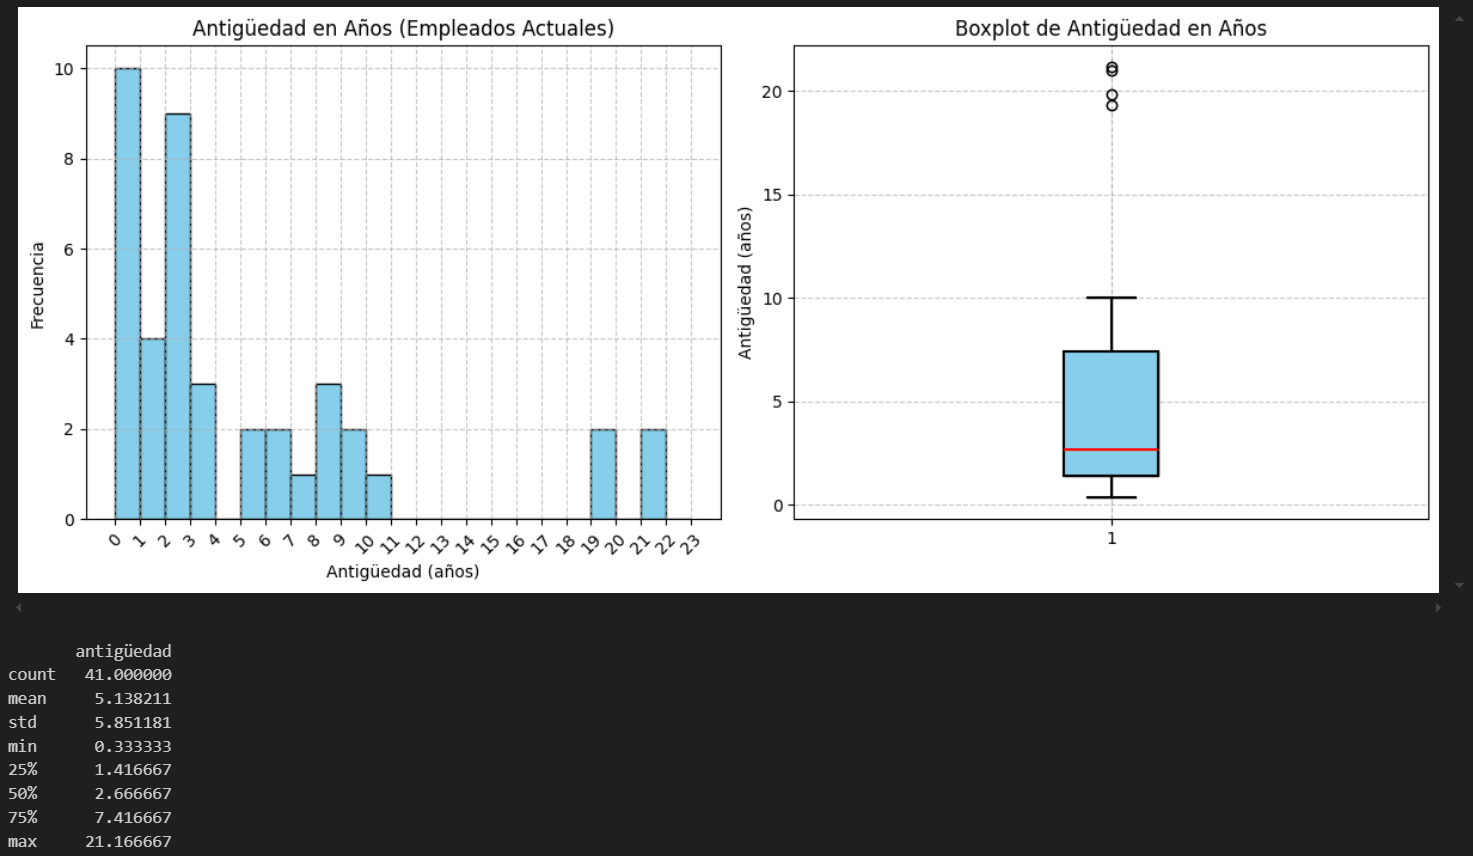
## 📊 Análisis de Antigüedad de Empleados Actuales  

### 📉 **Distribución de Antigüedad (Histograma)**  
- **Concentración en Baja Antigüedad:**  
  - El **34.1%** de los empleados actuales tienen menos de **2 años** de antigüedad.  
  - Un **31.7%** supera los **6 años**, y menos del **15%** alcanza los **10+ años**.  
- **Relación con Rotación:**  
  - La distribución refleja la alta rotación reportada: la mayoría de los empleados son "nuevos", lo que confirma que la empresa **no logra retener talento a mediano/largo plazo**.  

### 📦 **Boxplot de Antigüedad**  
- **Mediana Baja (~5 años):**  
  - El **63.4%** de los empleados actuales tienen una antigüedad menor a 5 años.  
  - El rango intercuartílico (25%-75%) se ubica entre **1.5 y 7.5 años**, mostrando una dispersión moderada.  
- **Valores Atípicos en Antigüedad Alta:**  
  - Existen casos aislados de empleados con **19-22 años**, pero son excepciones. Esto sugiere que, aunque la retención a muy largo plazo es posible, no es la norma.  <br>
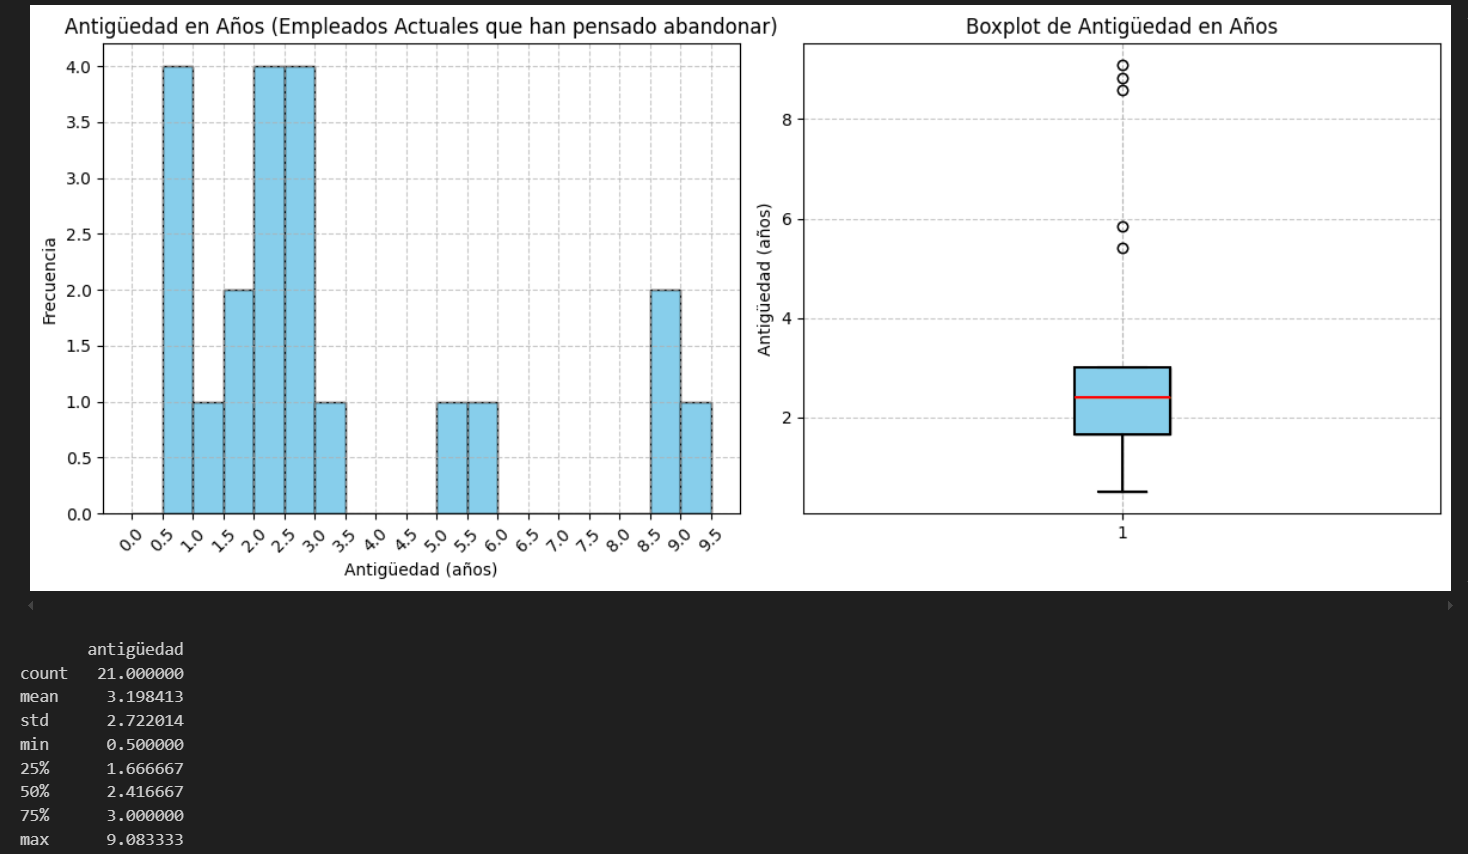
## 📊 Análisis de Antigüedad de Empleados Actuales  que han pensado abandonar la empresa
### 📉 **Distribución de Antigüedad (Histograma)**  
- **Concentración en Baja Antigüedad:**  
  - El **71.4%** de los empleados actuales que han pensado abandonar la empresa tienen menos de **3 años** de antigüedad.  
  - Hay picos interesantes en los semestres 2, 5 y 6, con 4 empleados cada uno que han manifestado su intención de abandonar la empresa, que representan **más del 50%** del total de estos.
- **Relación con Rotación:**  
  - La distribución refleja la alta rotación reportada: la mayoría de los empleados son "nuevos", lo que confirma que la empresa **no logra retener talento a mediano/largo plazo**.  

### 📦 **Boxplot de Antigüedad**  
- **Mediana Baja (~2.5 años):**  
  - El rango intercuartílico (25%-75%) se ubica entre **1.7 y 3 años**, mostrando poca dispersión.  
- **Valores Atípicos en Antigüedad Alta:**  
  - Existen casos aislados de empleados con **5-6 años** y **>8**, pero son excepciones. Esto sugiere que, aunque la retención a muy largo plazo es posible, no es la norma. 

### 🔍 **Conclusiones Clave**  
1. **Ciclo de Reemplazo Constante:** La baja antigüedad promedio (inferior a 3.5 años) implica costos recurrentes en reclutamiento y capacitación, además de pérdida de productividad por curva de aprendizaje.  
2. **Riesgo de Fuga de Conocimiento:** Los empleados con +5 años son críticos para preservar memoria institucional. Su salida podría generar brechas estratégicas.  

---
## 📌 Acciones para Mejorar la Retención a Largo Plazo  <br>
**Tomado y adaptado de: https://www.researchgate.net/publication/379689942_An_Exploration_Of_Effective_Onboarding_On_Employee_Engagement_And_Retention_In_Work_Organizations**
```latex
@article{article,
  author  = {Konyefa Dickson, Rachel and Stephan Isaiah, Oyeinkorikiye},
  title   = {An Exploration Of Effective Onboarding On Employee Engagement And Retention In Work Organizations},
  journal = {Unknown},
  year    = {2024},
  volume  = {9},
  pages   = {1--20},
  month   = mar,
}
```

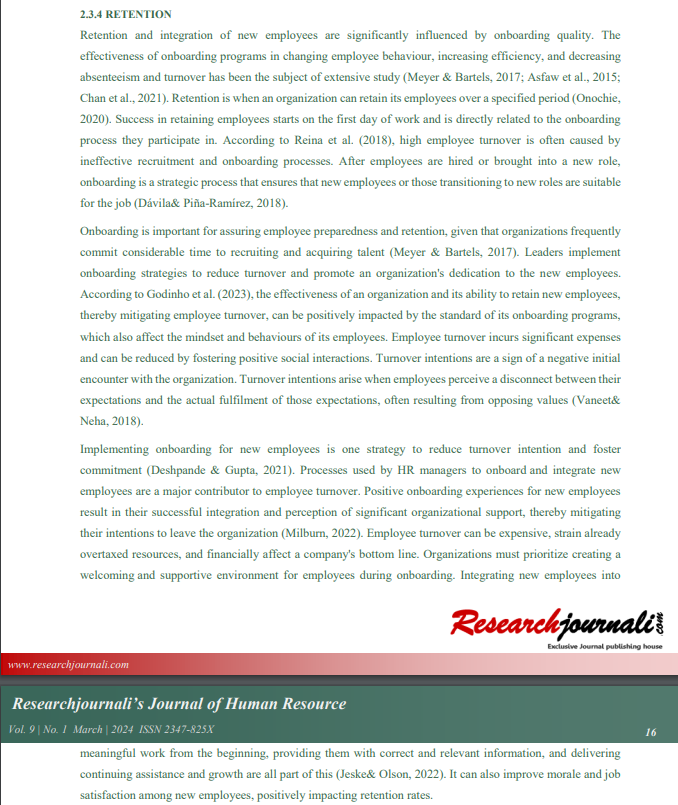
### 🟠 **Fortalecer la Transición de "Nuevo" a "Establecido"**  
- **Programas de Mentoría Inversa:**  
  - Empleados senior (>6 años) guían a juniors, mientras estos últimos comparten habilidades digitales/innovación.  
  - Crear un sistema de recompensas por contribución al desarrollo de colegas (Se sugiere comenzar a usar el módulo de _gamificación_ de Odoo).  

### 🟡 **Retención de Empleados Clave (>6 años)**  
- **Paquetes de Retención Personalizados:**  
  - Bonos por hitos (ej: 5, 8, 10 años) + beneficios no monetarios (ej: horario flexible, teletrabajo prioritario).  
  - Ofertas de roles híbridos (ej: combinar liderazgo operativo con mentoría, cursos, etc).  

### 🟢 **Plan de Sucesión para Empleados Senior (>6 años)**  
- **Mapeo de Conocimiento Crítico:**  
  - Documentar procesos, relaciones clave y estrategias manejadas por empleados de alta antigüedad.  
  - Asignar "aprendices estratégicos" para garantizar continuidad.  

### 🔵 **Cultura de Pertenencia a Largo Plazo**  
- **Reconocimiento Público de Trayectoria:**  
  - Galardones anuales para empleados con +4, +8 y +12 años (ej: "Legado Empresarial", "Pilar Estratégico").  
  - Historias destacadas en canales internos (ej: newsletters, intranet, blog del sitio web) sobre contribuciones de empleados senior.  

### 🟣 **Análisis de Satisfacción Segmentado**  
- **Encuestas Específicas por Antigüedad:**  
  - Para empleados con +3 años: evaluar percepciones sobre crecimiento, compensación y balance vida-trabajo.  
  - Para empleados con +6 años: identificar necesidades de reinvención o transición hacia roles consultivos.  

---  
**Nota:** La combinación de alta rotación temprana y baja antigüedad promedio en empleados actuales revela un **doble desafío**: retener a los nuevos *y* consolidar una base estable de talento experimentado. Las acciones deben ser bidireccionales: evitar fugas en etapas iniciales y convertir a empleados medios en pilares de largo plazo.  

---

---

# **Análisis de costos empresariales atribuidos al abandono de empleados**

Para analizar los costos asociados al abanodono de empleados tenemos que tener en cuenta varios aspectos que contribuyen a los mismos, como se plantea en [1], existen diversos factores que influyen en la rotación de personal, cada uno de ellos generando costos, tanto directos como indirectos, es por eso que es necesario hacer una estimación realista de los mismos. <br>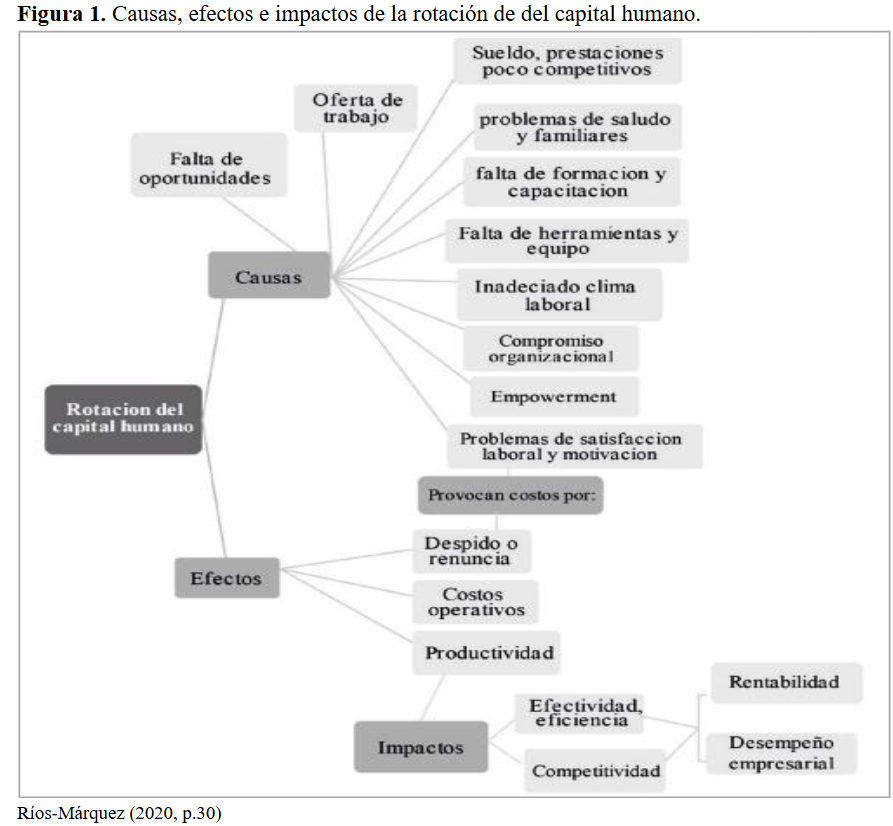 

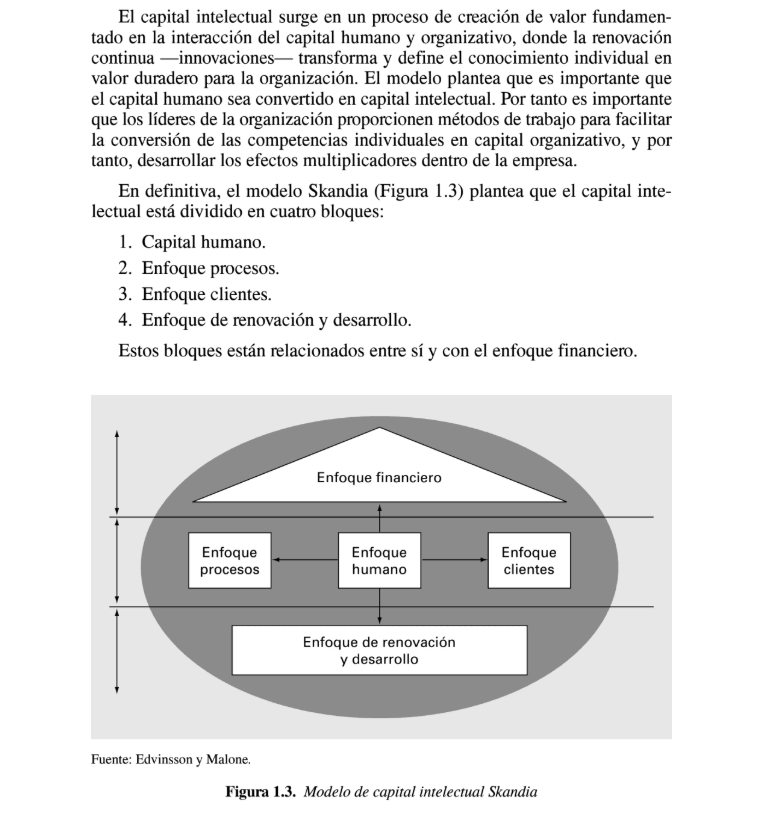 <br> (Gordillo, P. A. (2007). El ROI: De la remuneración al capital humano. Ingeniería Industrial, (25), 111-118.) <br>

* Para esto clasificaremos a los empleados teniendo en cuenta sus puestos dentro de la empresa, su antiegüedad al abandonar la misma y su salario, esto nos permitirá hacer una segmentación realista que describa correctamente los costos asociados a los abandonos. <br>
  
---
[1] González, B. A. S., Prince, I. G., Álvarez, M. Á. M., & Rodríguez, D. G. G. (2024). Impacto de la Rotación de Personal en los Costos y la Rentabilidad Empresarial. Ciencia Latina Revista Científica Multidisciplinar, 8(6), 6615-6627.

### Se extraen los datos necesarios del DataFrame original

In [766]:
datos_costos = reg_abandono[['correo','departamento' ,'puesto', 'razon_salida','tiempo_empresa', 'salario_anual']].copy()

In [767]:
def clasificar_tiempo(tiempo_en_años):
    if 0.1 <= tiempo_en_años <= 0.5: # Menos de 6 meses
        return '< 6 meses'
    elif 0.5 < tiempo_en_años <= 1: # 6 meses a 1 año (12 meses)
        return '6-12 meses'
    elif 1 < tiempo_en_años <= 1.5: # 1 año (más de 12) a 1.5 años (18 meses)
        return '1-1.5 años'
    elif 1.5 < tiempo_en_años <= 3: # 1.5 años (más de 18) a 3 años (36 meses)
        return '1.5-3 años'
    elif tiempo_en_años > 3: # Más de 3 años (más de 36 meses)
        return '>3 años'
    else:
        return 'Recién contratado' # Para casos inesperados (ej. tiempo negativo)   

In [768]:
# Definir los rangos de tiempo
rangos_tiempo = ['Recién contratado' ,'< 6 meses', '6-12 meses', '1-1.5 años', '1.5-3 años', '>3 años']

# Definir los niveles para los índices del df
niveles = {
    'Auxiliar de Administrativo': 'nivel_1',
    'Becario': 'nivel_1',
    'Recepcion de Items': 'nivel_1',
    'Metrologo Jr.': 'nivel_1',
    'Auxiliar de Calidad': 'nivel_1',
    'Lider Regional de Sucursal': 'nivel_2', 
    'Metrologo': 'nivel_2', 
    'Representante Comercial Sr.': 'nivel_2', 
    'Supervisor de Laboratorio': 'nivel_2',
    'Jefe de Laboratorio': 'nivel_3'
}

nombre_niveles = ['nivel_1', 'nivel_2', 'nivel_3']

matriz_costos = {
    rangos_tiempo[0]: [[10,15], [10,15], [10,15]],
    rangos_tiempo[1]: [[35, 60], [80, 130], [100, 130]],
    rangos_tiempo[2]: [[25, 40], [65, 110], [120, 150]],
    rangos_tiempo[3]: [[17, 30], [50, 95], [140, 170]],
    rangos_tiempo[4]: [[15, 25], [80, 130], [160, 190]],
    rangos_tiempo[5]: [[12, 20], [100, 165], [180, 213]]
}

df_matriz_costos = pd.DataFrame(matriz_costos, index=nombre_niveles)

In [769]:
df_matriz_costos

,Recién contratado,< 6 meses,6-12 meses,1-1.5 años,1.5-3 años,>3 años
nivel_1,"[10, 15]","[35, 60]","[25, 40]","[17, 30]","[15, 25]","[12, 20]"
nivel_2,"[10, 15]","[80, 130]","[65, 110]","[50, 95]","[80, 130]","[100, 165]"
nivel_3,"[10, 15]","[100, 130]","[120, 150]","[140, 170]","[160, 190]","[180, 213]"


In [770]:
def factor_motivo(razon_salida):
    if razon_salida == 'Despido':
        return 1
    else:
        return 0.7

In [771]:
datos_costos['factor_motivo'] = datos_costos['razon_salida'].map(factor_motivo)

In [772]:
datos_costos['nivel'] = datos_costos['puesto'].map(niveles)

In [773]:
aa = pysqldf("""
             SELECT puesto, COUNT(correo)
             FROM datos_costos
             GROUP BY puesto
             """)
aa

,puesto,COUNT(correo)
0,Auxiliar de Administrativo,1
1,Auxiliar de Calidad,2
2,Becario,1
3,Jefe de Laboratorio,3
4,Lider Regional de Sucursal,1
5,Metrologo,5
6,Metrologo,1
7,Metrologo Jr.,7
8,Recepcion de Items,1
9,Representante Comercial Sr.,1


In [774]:
datos_costos['map_tiempo'] =datos_costos['tiempo_empresa'].map(clasificar_tiempo)
datos_costos

,correo,departamento,puesto,razon_salida,tiempo_empresa,salario_anual,factor_motivo,nivel,map_tiempo
0,andres.reyes@inscomexico.com,Tecnico,Metrologo Jr.,Despido,0.21,135600,1.0,nivel_1,< 6 meses
1,benjamin.urbano@inscomexico.com,Tecnico,Jefe de Laboratorio,Renuncia,18.58,294000,0.7,nivel_3,>3 años
2,daniel.villegas@inscomexico.com,Tecnico,Metrologo,Renuncia,5.58,228000,0.7,nivel_2,>3 años
3,daniela.beltran@inscomexico.com,Tecnico,Metrologo,Renuncia,2.47,156000,0.7,nivel_2,1.5-3 años
4,dulce@inscomexico.com,Tecnico,Supervisor de Laboratorio,Renuncia,6.21,192000,0.7,nivel_2,>3 años
5,dulce.cruz@inscomexico.com,Tecnico,Metrologo Jr.,Renuncia,0.21,105600,0.7,nivel_1,< 6 meses
6,erick.barajas@inscomexico.com,Tecnico,Metrologo,Renuncia,1.85,204000,0.7,nivel_2,1.5-3 años
7,francisco.cipriano@inscomexico.com,Tecnico,Metrologo Jr.,Renuncia,0.03,156000,0.7,nivel_1,Recién contratado
8,german.crisostomo@inscomexico.com,Calidad,Auxiliar de Calidad,Renuncia,2.38,135600,0.7,nivel_1,1.5-3 años
9,irene.salgado@inscomexico.com,Tecnico,Metrologo,Renuncia,1.59,135600,0.7,nivel_2,1.5-3 años


In [775]:
datos_costos['map_perc'] = datos_costos.apply(
    lambda row: df_matriz_costos.loc[row['nivel'], row['map_tiempo']],
    axis=1
)

datos_costos

KeyError: nan

In [ ]:
datos_costos['costo_optimista'] = datos_costos['factor_motivo']*datos_costos['map_perc'].apply(lambda x: x[0])*datos_costos['salario_anual']/100
datos_costos['costo_peor_escenario'] = datos_costos['factor_motivo']*datos_costos['map_perc'].apply(lambda x: x[1])*datos_costos['salario_anual']/100

In [ ]:
datos_costos

In [ ]:
reg_abandono.set_index('correo', inplace=True)

In [ ]:
print(f"El costo optimista es ${datos_costos['costo_optimista'].sum():.2f}, mientras que si tomamos el peor escenario este asciende a ${datos_costos['costo_peor_escenario'].sum():.2f}")

In [ ]:
# Suponiendo que reg_abandono es más largo
datos_costos_filtrado = datos_costos[['nivel', 'costo_optimista', 'costo_peor_escenario']].iloc[:len(reg_abandono)]

df_costos = pd.concat(
    [reg_abandono.reset_index(drop=True), datos_costos_filtrado.reset_index(drop=True)],
    axis=1
)


In [ ]:
print(len(reg_abandono))
print(len(datos_costos[['nivel', 'costo_optimista', 'costo_peor_escenario']]))


In [ ]:
df_costos = df_costos.round(2)

df_costos

In [ ]:
df_costos.to_csv("C:\\Users\\Miguel Oscar\\Projects\\data-INSCO-hub\\data\\processed\\turnover_costs.csv", index=False, encoding='utf-8-sig')


In [ ]:
datos_costos.groupby('departamento')['costo_optimista'].sum()

In [ ]:
fig = px.bar(
    dep,
    x = dep.index,
    y = dep.values,
    title='Abandonos por departamento',
    
)
fig.show()

In [ ]:
dep_abandono = reg_abandono.groupby('departamento').tiempo_empresa.mean().sort_values(ascending=False)
dep_abandono

In [ ]:
fig = px.bar(
    dep_abandono,
    x = dep_abandono.index,
    y = dep_abandono.values
)
fig.show()

In [ ]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

In [ ]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

---
<br/><br/>

### ¿Cúanto nos ha costado este problema en el último año?

In [ ]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [ ]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

Ahora vamos a estimar cuántos se nos irán este año

In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [ ]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada